Datasets is ready!


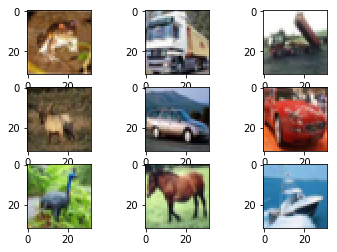

In [10]:
# 导入相关库
from keras.constraints import maxnorm
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets  import cifar
from matplotlib import pyplot
from scipy.misc import toimage
from PIL.Image import fromarray
from keras import backend as K
import numpy as np
import os

# 将数据下载到本地 重写cifar加载数据方法
def load_data(path):

    num_train_samples = 50000

    x_train = np.empty((num_train_samples, 3, 32, 32), dtype='uint8')
    y_train = np.empty((num_train_samples,), dtype='uint8')

    for i in range(1, 6):
        fpath = os.path.join(path, 'data_batch_' + str(i))
        (x_train[(i - 1) * 10000: i * 10000, :, :, :],
         y_train[(i - 1) * 10000: i * 10000]) = cifar.load_batch(fpath)

    fpath = os.path.join(path, 'test_batch')
    x_test, y_test = cifar.load_batch(fpath)

    y_train = np.reshape(y_train, (len(y_train), 1))
    y_test = np.reshape(y_test, (len(y_test), 1))

    if K.image_data_format() == 'channels_last':
        x_train = x_train.transpose(0, 2, 3, 1)
        x_test = x_test.transpose(0, 2, 3, 1)

    return (x_train, y_train), (x_test, y_test)

# 定义训练集、测试集
(X_train, y_train), (X_test, y_test) = load_data(
    'E:\\java_other\\python\\data\\cifar-10-batches-py')

print("Datasets is ready!")

# 预览部分图片
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(fromarray(X_train[i]))
    #pyplot.imshow(Image.open(StringIO.StringIO(X_train[i])))

pyplot.show()



In [11]:
# 对标签进行独热码编码
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# 设置神经网络对象model
model = Sequential()
model.add(Convolution2D(32,3,3,input_shape=(32,32,3),
                        border_mode='same',activation='relu',
                        W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32,3,3,activation='relu',
                        border_mode='same',W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

print("Neural Network built!")

Neural Network built!


D:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", kernel_constraint=<keras.con..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
D:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_constraint=<keras.con..., activation="relu", padding="same")`
  del sys.path[0]
D:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_constraint=<keras.con..., activation="relu")`
  app.launch_new_instance()


In [13]:
# 设定训练过程
epoches = 1  # 对训练集的迭代次数（这里设为最小的1）
lrate = 0.01 # 初始学习率
decay = lrate/epoches

# 优化器设置与编译
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
print(model.summary())

# 用训练集数据训练网络
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=epoches,
          batch_size=32, verbose=1)

# 输出神经网络的表现
scores = model.evaluate(X_test, y_test, verbose=0)
print(("Accuracy: %.2f%%").format((scores[1]*100)),(scores[1]*100))
#print("Accuracy: %.2f%%") % (scores[1]*100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

D:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/1


   32/50000 [..............................] - ETA: 21:45 - loss: 15.1107 - acc: 0.0625

   64/50000 [..............................] - ETA: 17:32 - loss: 14.1033 - acc: 0.1250

   96/50000 [..............................] - ETA: 17:39 - loss: 14.1033 - acc: 0.1250

  128/50000 [..............................] - ETA: 17:20 - loss: 14.3552 - acc: 0.1094

  160/50000 [..............................] - ETA: 16:47 - loss: 14.6070 - acc: 0.0938

  192/50000 [..............................] - ETA: 16:38 - loss: 14.7749 - acc: 0.0833

  224/50000 [..............................] - ETA: 16:13 - loss: 14.7509 - acc: 0.0848

  256/50000 [..............................] - ETA: 16:15 - loss: 14.6700 - acc: 0.0898

  288/50000 [..............................] - ETA: 16:37 - loss: 14.7190 - acc: 0.0868

  320/50000 [..............................] - ETA: 17:15 - loss: 14.7581 - acc: 0.0844

  352/50000 [..............................] - ETA: 17:31 - loss: 14.5612 - acc: 0.0966

  384/50000 [..............................] - ETA: 17:19 - loss: 14.6070 - acc: 0.0938

  416/50000 [..............................] - ETA: 17:11 - loss: 14.4908 - acc: 0.1010

  448/50000 [..............................] - ETA: 16:47 - loss: 14.5351 - acc: 0.0982

  480/50000 [..............................] - ETA: 16:40 - loss: 14.5063 - acc: 0.1000

  512/50000 [..............................] - ETA: 16:51 - loss: 14.5755 - acc: 0.0957

  544/50000 [..............................] - ETA: 16:41 - loss: 14.4885 - acc: 0.1011

  576/50000 [..............................] - ETA: 16:35 - loss: 14.4671 - acc: 0.1024

  608/50000 [..............................] - ETA: 16:25 - loss: 14.5010 - acc: 0.1003

  640/50000 [..............................] - ETA: 16:21 - loss: 14.5063 - acc: 0.1000

  672/50000 [..............................] - ETA: 16:13 - loss: 14.4871 - acc: 0.1012

  704/50000 [..............................] - ETA: 16:06 - loss: 14.4697 - acc: 0.1023

  736/50000 [..............................] - ETA: 16:00 - loss: 14.4537 - acc: 0.1033

  768/50000 [..............................] - ETA: 16:00 - loss: 14.5021 - acc: 0.1003

  800/50000 [..............................] - ETA: 15:52 - loss: 14.5264 - acc: 0.0988

  832/50000 [..............................] - ETA: 15:43 - loss: 14.4714 - acc: 0.1022

  864/50000 [..............................] - ETA: 15:38 - loss: 14.4578 - acc: 0.1030

  896/50000 [..............................] - ETA: 15:31 - loss: 14.4991 - acc: 0.1004

  928/50000 [..............................] - ETA: 15:26 - loss: 14.4854 - acc: 0.1013

  960/50000 [..............................] - ETA: 15:22 - loss: 14.5231 - acc: 0.0990

  992/50000 [..............................] - ETA: 15:17 - loss: 14.4283 - acc: 0.1048

 1024/50000 [..............................] - ETA: 15:13 - loss: 14.4496 - acc: 0.1035

 1056/50000 [..............................] - ETA: 15:10 - loss: 14.4391 - acc: 0.1042

 1088/50000 [..............................] - ETA: 15:06 - loss: 14.4885 - acc: 0.1011

 1120/50000 [..............................] - ETA: 15:04 - loss: 14.5063 - acc: 0.1000

 1152/50000 [..............................] - ETA: 15:00 - loss: 14.5371 - acc: 0.0981

 1184/50000 [..............................] - ETA: 14:55 - loss: 14.5117 - acc: 0.0997

 1216/50000 [..............................] - ETA: 14:49 - loss: 14.5407 - acc: 0.0979

 1248/50000 [..............................] - ETA: 14:46 - loss: 14.5295 - acc: 0.0986

 1280/50000 [..............................] - ETA: 14:43 - loss: 14.5567 - acc: 0.0969

 1312/50000 [..............................] - ETA: 14:40 - loss: 14.5702 - acc: 0.0960

 1344/50000 [..............................] - ETA: 14:37 - loss: 14.5830 - acc: 0.0952

 1376/50000 [..............................] - ETA: 14:37 - loss: 14.5719 - acc: 0.0959

 1408/50000 [..............................] - ETA: 14:36 - loss: 14.5383 - acc: 0.0980

 1440/50000 [..............................] - ETA: 14:36 - loss: 14.5063 - acc: 0.1000

 1472/50000 [..............................] - ETA: 14:32 - loss: 14.4756 - acc: 0.1019

 1504/50000 [..............................] - ETA: 14:28 - loss: 14.4356 - acc: 0.1044

 1536/50000 [..............................] - ETA: 14:29 - loss: 14.4181 - acc: 0.1055

 1568/50000 [..............................] - ETA: 14:33 - loss: 14.4426 - acc: 0.1040

 1600/50000 [..............................] - ETA: 14:34 - loss: 14.4156 - acc: 0.1056

 1632/50000 [..............................] - ETA: 14:31 - loss: 14.3996 - acc: 0.1066

 1664/50000 [..............................] - ETA: 14:30 - loss: 14.4036 - acc: 0.1064

 1696/50000 [>.............................] - ETA: 14:28 - loss: 14.3979 - acc: 0.1067

 1728/50000 [>.............................] - ETA: 14:27 - loss: 14.4111 - acc: 0.1059

 1760/50000 [>.............................] - ETA: 14:27 - loss: 14.4239 - acc: 0.1051

 1792/50000 [>.............................] - ETA: 14:23 - loss: 14.4181 - acc: 0.1055

 1824/50000 [>.............................] - ETA: 14:21 - loss: 14.4215 - acc: 0.1053

 1856/50000 [>.............................] - ETA: 14:20 - loss: 14.4507 - acc: 0.1034

 1888/50000 [>.............................] - ETA: 14:22 - loss: 14.4704 - acc: 0.1022

 1920/50000 [>.............................] - ETA: 14:22 - loss: 14.4643 - acc: 0.1026

 1952/50000 [>.............................] - ETA: 14:24 - loss: 14.4584 - acc: 0.1030

 1984/50000 [>.............................] - ETA: 14:25 - loss: 14.4527 - acc: 0.1033

 2016/50000 [>.............................] - ETA: 14:25 - loss: 14.4551 - acc: 0.1032

 2048/50000 [>.............................] - ETA: 14:25 - loss: 14.4496 - acc: 0.1035

 2080/50000 [>.............................] - ETA: 14:22 - loss: 14.4365 - acc: 0.1043

 2112/50000 [>.............................] - ETA: 14:19 - loss: 14.4315 - acc: 0.1046

 2144/50000 [>.............................] - ETA: 14:16 - loss: 14.4416 - acc: 0.1040

 2176/50000 [>.............................] - ETA: 14:16 - loss: 14.4293 - acc: 0.1048

 2208/50000 [>.............................] - ETA: 14:16 - loss: 14.4245 - acc: 0.1051

 2240/50000 [>.............................] - ETA: 14:17 - loss: 14.4199 - acc: 0.1054

 2272/50000 [>.............................] - ETA: 14:22 - loss: 14.4368 - acc: 0.1043

 2304/50000 [>.............................] - ETA: 14:25 - loss: 14.4461 - acc: 0.1037

 2336/50000 [>.............................] - ETA: 14:25 - loss: 14.4414 - acc: 0.1040

 2368/50000 [>.............................] - ETA: 14:24 - loss: 14.4437 - acc: 0.1039

 2400/50000 [>.............................] - ETA: 14:21 - loss: 14.4391 - acc: 0.1042

 2432/50000 [>.............................] - ETA: 14:19 - loss: 14.4281 - acc: 0.1049

 2464/50000 [>.............................] - ETA: 14:16 - loss: 14.4500 - acc: 0.1035

 2496/50000 [>.............................] - ETA: 14:14 - loss: 14.4585 - acc: 0.1030

 2528/50000 [>.............................] - ETA: 14:09 - loss: 14.4668 - acc: 0.1025

 2560/50000 [>.............................] - ETA: 14:04 - loss: 14.4748 - acc: 0.1020

 2592/50000 [>.............................] - ETA: 13:58 - loss: 14.4516 - acc: 0.1034

 2624/50000 [>.............................] - ETA: 13:52 - loss: 14.4596 - acc: 0.1029

 2656/50000 [>.............................] - ETA: 13:46 - loss: 14.4796 - acc: 0.1017

 2688/50000 [>.............................] - ETA: 13:42 - loss: 14.4991 - acc: 0.1004

 2720/50000 [>.............................] - ETA: 13:37 - loss: 14.5122 - acc: 0.0996

 2752/50000 [>.............................] - ETA: 13:32 - loss: 14.5192 - acc: 0.0992

 2784/50000 [>.............................] - ETA: 13:26 - loss: 14.5318 - acc: 0.0984

 2816/50000 [>.............................] - ETA: 13:21 - loss: 14.5383 - acc: 0.0980

 2848/50000 [>.............................] - ETA: 13:17 - loss: 14.5448 - acc: 0.0976

 2880/50000 [>.............................] - ETA: 13:12 - loss: 14.5511 - acc: 0.0972

 2912/50000 [>.............................] - ETA: 13:07 - loss: 14.5572 - acc: 0.0968

 2944/50000 [>.............................] - ETA: 13:02 - loss: 14.5468 - acc: 0.0975

 2976/50000 [>.............................] - ETA: 12:57 - loss: 14.5366 - acc: 0.0981

 3008/50000 [>.............................] - ETA: 12:53 - loss: 14.5320 - acc: 0.0984

 3040/50000 [>.............................] - ETA: 12:50 - loss: 14.5275 - acc: 0.0987

 3072/50000 [>.............................] - ETA: 12:46 - loss: 14.5388 - acc: 0.0980

 3104/50000 [>.............................] - ETA: 12:42 - loss: 14.5447 - acc: 0.0976

 3136/50000 [>.............................] - ETA: 12:38 - loss: 14.5402 - acc: 0.0979

 3168/50000 [>.............................] - ETA: 12:33 - loss: 14.5358 - acc: 0.0982

 3200/50000 [>.............................] - ETA: 12:29 - loss: 14.5264 - acc: 0.0988

 3232/50000 [>.............................] - ETA: 12:25 - loss: 14.5322 - acc: 0.0984

 3264/50000 [>.............................] - ETA: 12:22 - loss: 14.5280 - acc: 0.0987

 3296/50000 [>.............................] - ETA: 12:19 - loss: 14.5239 - acc: 0.0989

 3328/50000 [>.............................] - ETA: 12:15 - loss: 14.5247 - acc: 0.0989

 3360/50000 [=>............................] - ETA: 12:11 - loss: 14.5207 - acc: 0.0991

 3392/50000 [=>............................] - ETA: 12:07 - loss: 14.5120 - acc: 0.0996

 3424/50000 [=>............................] - ETA: 12:04 - loss: 14.5176 - acc: 0.0993

 3456/50000 [=>............................] - ETA: 12:00 - loss: 14.5044 - acc: 0.1001

 3488/50000 [=>............................] - ETA: 11:57 - loss: 14.5054 - acc: 0.1001

 3520/50000 [=>............................] - ETA: 11:53 - loss: 14.5017 - acc: 0.1003

 3552/50000 [=>............................] - ETA: 11:50 - loss: 14.4981 - acc: 0.1005

 3584/50000 [=>............................] - ETA: 11:48 - loss: 14.4991 - acc: 0.1004

 3616/50000 [=>............................] - ETA: 11:46 - loss: 14.5090 - acc: 0.0998

 3648/50000 [=>............................] - ETA: 11:43 - loss: 14.5098 - acc: 0.0998

 3680/50000 [=>............................] - ETA: 11:40 - loss: 14.5063 - acc: 0.1000

 3712/50000 [=>............................] - ETA: 11:37 - loss: 14.4941 - acc: 0.1008

 3744/50000 [=>............................] - ETA: 11:34 - loss: 14.5037 - acc: 0.1002

 3776/50000 [=>............................] - ETA: 11:31 - loss: 14.5003 - acc: 0.1004

 3808/50000 [=>............................] - ETA: 11:28 - loss: 14.4970 - acc: 0.1006

 3840/50000 [=>............................] - ETA: 11:25 - loss: 14.5021 - acc: 0.1003

 3872/50000 [=>............................] - ETA: 11:21 - loss: 14.5030 - acc: 0.1002

 3904/50000 [=>............................] - ETA: 11:19 - loss: 14.4956 - acc: 0.1007

 3936/50000 [=>............................] - ETA: 11:16 - loss: 14.5087 - acc: 0.0998

 3968/50000 [=>............................] - ETA: 11:13 - loss: 14.5136 - acc: 0.0995

 4000/50000 [=>............................] - ETA: 11:10 - loss: 14.5103 - acc: 0.0998

 4032/50000 [=>............................] - ETA: 11:07 - loss: 14.5191 - acc: 0.0992

 4064/50000 [=>............................] - ETA: 11:05 - loss: 14.5237 - acc: 0.0989

 4096/50000 [=>............................] - ETA: 11:02 - loss: 14.5086 - acc: 0.0999

 4128/50000 [=>............................] - ETA: 11:00 - loss: 14.5133 - acc: 0.0996

 4160/50000 [=>............................] - ETA: 10:58 - loss: 14.5140 - acc: 0.0995

 4192/50000 [=>............................] - ETA: 10:57 - loss: 14.5224 - acc: 0.0990

 4224/50000 [=>............................] - ETA: 10:55 - loss: 14.5269 - acc: 0.0987

 4256/50000 [=>............................] - ETA: 10:53 - loss: 14.5199 - acc: 0.0992

 4288/50000 [=>............................] - ETA: 10:51 - loss: 14.5206 - acc: 0.0991

 4320/50000 [=>............................] - ETA: 10:49 - loss: 14.5175 - acc: 0.0993

 4352/50000 [=>............................] - ETA: 10:46 - loss: 14.5181 - acc: 0.0993

 4384/50000 [=>............................] - ETA: 10:44 - loss: 14.5151 - acc: 0.0995

 4416/50000 [=>............................] - ETA: 10:42 - loss: 14.5194 - acc: 0.0992

 4448/50000 [=>............................] - ETA: 10:41 - loss: 14.5201 - acc: 0.0991

 4480/50000 [=>............................] - ETA: 10:38 - loss: 14.5279 - acc: 0.0987

 4512/50000 [=>............................] - ETA: 10:36 - loss: 14.5392 - acc: 0.0980

 4544/50000 [=>............................] - ETA: 10:34 - loss: 14.5325 - acc: 0.0984

 4576/50000 [=>............................] - ETA: 10:32 - loss: 14.5331 - acc: 0.0983

 4608/50000 [=>............................] - ETA: 10:30 - loss: 14.5371 - acc: 0.0981

 4640/50000 [=>............................] - ETA: 10:27 - loss: 14.5375 - acc: 0.0981

 4672/50000 [=>............................] - ETA: 10:25 - loss: 14.5380 - acc: 0.0980

 4704/50000 [=>............................] - ETA: 10:24 - loss: 14.5385 - acc: 0.0980

 4736/50000 [=>............................] - ETA: 10:22 - loss: 14.5458 - acc: 0.0976

 4768/50000 [=>............................] - ETA: 10:21 - loss: 14.5529 - acc: 0.0971

 4800/50000 [=>............................] - ETA: 10:19 - loss: 14.5567 - acc: 0.0969

 4832/50000 [=>............................] - ETA: 10:18 - loss: 14.5570 - acc: 0.0969

 4864/50000 [=>............................] - ETA: 10:16 - loss: 14.5639 - acc: 0.0964

 4896/50000 [=>............................] - ETA: 10:14 - loss: 14.5609 - acc: 0.0966

 4928/50000 [=>............................] - ETA: 10:12 - loss: 14.5612 - acc: 0.0966

 4960/50000 [=>............................] - ETA: 10:10 - loss: 14.5550 - acc: 0.0970

 4992/50000 [=>............................] - ETA: 10:08 - loss: 14.5521 - acc: 0.0972

 5024/50000 [==>...........................] - ETA: 10:06 - loss: 14.5525 - acc: 0.0971

 5056/50000 [==>...........................] - ETA: 10:04 - loss: 14.5560 - acc: 0.0969

 5088/50000 [==>...........................] - ETA: 10:02 - loss: 14.5563 - acc: 0.0969

 5120/50000 [==>...........................] - ETA: 10:00 - loss: 14.5598 - acc: 0.0967

 5152/50000 [==>...........................] - ETA: 9:59 - loss: 14.5570 - acc: 0.0969 

 5184/50000 [==>...........................] - ETA: 9:57 - loss: 14.5666 - acc: 0.0963

 5216/50000 [==>...........................] - ETA: 9:56 - loss: 14.5699 - acc: 0.0961

 5248/50000 [==>...........................] - ETA: 9:55 - loss: 14.5640 - acc: 0.0964

 5280/50000 [==>...........................] - ETA: 9:54 - loss: 14.5490 - acc: 0.0973

 5312/50000 [==>...........................] - ETA: 9:52 - loss: 14.5524 - acc: 0.0971

 5344/50000 [==>...........................] - ETA: 9:52 - loss: 14.5467 - acc: 0.0975

 5376/50000 [==>...........................] - ETA: 9:50 - loss: 14.5441 - acc: 0.0977

 5408/50000 [==>...........................] - ETA: 9:49 - loss: 14.5444 - acc: 0.0976

 5440/50000 [==>...........................] - ETA: 9:47 - loss: 14.5507 - acc: 0.0972

 5472/50000 [==>...........................] - ETA: 9:45 - loss: 14.5599 - acc: 0.0967

 5504/50000 [==>...........................] - ETA: 9:43 - loss: 14.5602 - acc: 0.0967

 5536/50000 [==>...........................] - ETA: 9:42 - loss: 14.5634 - acc: 0.0965

 5568/50000 [==>...........................] - ETA: 9:40 - loss: 14.5578 - acc: 0.0968

 5600/50000 [==>...........................] - ETA: 9:38 - loss: 14.5667 - acc: 0.0963

 5632/50000 [==>...........................] - ETA: 9:37 - loss: 14.5755 - acc: 0.0957

 5664/50000 [==>...........................] - ETA: 9:35 - loss: 14.5757 - acc: 0.0957

 5696/50000 [==>...........................] - ETA: 9:33 - loss: 14.5731 - acc: 0.0959

 5728/50000 [==>...........................] - ETA: 9:32 - loss: 14.5733 - acc: 0.0958

 5760/50000 [==>...........................] - ETA: 9:30 - loss: 14.5790 - acc: 0.0955

 5792/50000 [==>...........................] - ETA: 9:29 - loss: 14.5848 - acc: 0.0951

 5824/50000 [==>...........................] - ETA: 9:28 - loss: 14.5849 - acc: 0.0951

 5856/50000 [==>...........................] - ETA: 9:27 - loss: 14.5767 - acc: 0.0956

 5888/50000 [==>...........................] - ETA: 9:25 - loss: 14.5769 - acc: 0.0956

 5920/50000 [==>...........................] - ETA: 9:24 - loss: 14.5744 - acc: 0.0958

 5952/50000 [==>...........................] - ETA: 9:22 - loss: 14.5745 - acc: 0.0958

 5984/50000 [==>...........................] - ETA: 9:21 - loss: 14.5666 - acc: 0.0963

 6016/50000 [==>...........................] - ETA: 9:19 - loss: 14.5695 - acc: 0.0961

 6048/50000 [==>...........................] - ETA: 9:18 - loss: 14.5697 - acc: 0.0961

 6080/50000 [==>...........................] - ETA: 9:17 - loss: 14.5673 - acc: 0.0962

 6112/50000 [==>...........................] - ETA: 9:15 - loss: 14.5701 - acc: 0.0960

 6144/50000 [==>...........................] - ETA: 9:14 - loss: 14.5729 - acc: 0.0959

 6176/50000 [==>...........................] - ETA: 9:13 - loss: 14.5731 - acc: 0.0959

 6208/50000 [==>...........................] - ETA: 9:11 - loss: 14.5733 - acc: 0.0958

 6240/50000 [==>...........................] - ETA: 9:10 - loss: 14.5760 - acc: 0.0957

 6272/50000 [==>...........................] - ETA: 9:08 - loss: 14.5736 - acc: 0.0958

 6304/50000 [==>...........................] - ETA: 9:07 - loss: 14.5738 - acc: 0.0958

 6336/50000 [==>...........................] - ETA: 9:05 - loss: 14.5689 - acc: 0.0961

 6368/50000 [==>...........................] - ETA: 9:05 - loss: 14.5665 - acc: 0.0963

 6400/50000 [==>...........................] - ETA: 9:04 - loss: 14.5692 - acc: 0.0961

 6432/50000 [==>...........................] - ETA: 9:03 - loss: 14.5694 - acc: 0.0961

 6464/50000 [==>...........................] - ETA: 9:02 - loss: 14.5721 - acc: 0.0959

 6496/50000 [==>...........................] - ETA: 9:00 - loss: 14.5748 - acc: 0.0958

 6528/50000 [==>...........................] - ETA: 8:59 - loss: 14.5774 - acc: 0.0956

 6560/50000 [==>...........................] - ETA: 8:58 - loss: 14.5800 - acc: 0.0954

 6592/50000 [==>...........................] - ETA: 8:57 - loss: 14.5752 - acc: 0.0957

 6624/50000 [==>...........................] - ETA: 8:55 - loss: 14.5657 - acc: 0.0963

 6656/50000 [==>...........................] - ETA: 8:54 - loss: 14.5634 - acc: 0.0965

 6688/50000 [===>..........................] - ETA: 8:53 - loss: 14.5661 - acc: 0.0963

 6720/50000 [===>..........................] - ETA: 8:52 - loss: 14.5639 - acc: 0.0964

 6752/50000 [===>..........................] - ETA: 8:51 - loss: 14.5593 - acc: 0.0967

 6784/50000 [===>..........................] - ETA: 8:50 - loss: 14.5571 - acc: 0.0968

 6816/50000 [===>..........................] - ETA: 8:49 - loss: 14.5550 - acc: 0.0970

 6848/50000 [===>..........................] - ETA: 8:48 - loss: 14.5599 - acc: 0.0967

 6880/50000 [===>..........................] - ETA: 8:47 - loss: 14.5555 - acc: 0.0969

 6912/50000 [===>..........................] - ETA: 8:46 - loss: 14.5627 - acc: 0.0965

 6944/50000 [===>..........................] - ETA: 8:46 - loss: 14.5629 - acc: 0.0965

 6976/50000 [===>..........................] - ETA: 8:45 - loss: 14.5677 - acc: 0.0962

 7008/50000 [===>..........................] - ETA: 8:44 - loss: 14.5610 - acc: 0.0966

 7040/50000 [===>..........................] - ETA: 8:43 - loss: 14.5658 - acc: 0.0963

 7072/50000 [===>..........................] - ETA: 8:41 - loss: 14.5614 - acc: 0.0966

 7104/50000 [===>..........................] - ETA: 8:40 - loss: 14.5685 - acc: 0.0961

 7136/50000 [===>..........................] - ETA: 8:39 - loss: 14.5709 - acc: 0.0960

 7168/50000 [===>..........................] - ETA: 8:38 - loss: 14.5733 - acc: 0.0958

 7200/50000 [===>..........................] - ETA: 8:37 - loss: 14.5645 - acc: 0.0964

 7232/50000 [===>..........................] - ETA: 8:36 - loss: 14.5647 - acc: 0.0964

 7264/50000 [===>..........................] - ETA: 8:35 - loss: 14.5671 - acc: 0.0962

 7296/50000 [===>..........................] - ETA: 8:34 - loss: 14.5650 - acc: 0.0964

 7328/50000 [===>..........................] - ETA: 8:33 - loss: 14.5696 - acc: 0.0961

 7360/50000 [===>..........................] - ETA: 8:31 - loss: 14.5676 - acc: 0.0962

 7392/50000 [===>..........................] - ETA: 8:30 - loss: 14.5700 - acc: 0.0960

 7424/50000 [===>..........................] - ETA: 8:29 - loss: 14.5658 - acc: 0.0963

 7456/50000 [===>..........................] - ETA: 8:28 - loss: 14.5595 - acc: 0.0967

 7488/50000 [===>..........................] - ETA: 8:28 - loss: 14.5575 - acc: 0.0968

 7520/50000 [===>..........................] - ETA: 8:27 - loss: 14.5556 - acc: 0.0969

 7552/50000 [===>..........................] - ETA: 8:27 - loss: 14.5494 - acc: 0.0973

 7584/50000 [===>..........................] - ETA: 8:26 - loss: 14.5539 - acc: 0.0970

 7616/50000 [===>..........................] - ETA: 8:25 - loss: 14.5541 - acc: 0.0970

 7648/50000 [===>..........................] - ETA: 8:24 - loss: 14.5522 - acc: 0.0971

 7680/50000 [===>..........................] - ETA: 8:23 - loss: 14.5525 - acc: 0.0971

 7712/50000 [===>..........................] - ETA: 8:22 - loss: 14.5548 - acc: 0.0970

 7744/50000 [===>..........................] - ETA: 8:22 - loss: 14.5508 - acc: 0.0972

 7776/50000 [===>..........................] - ETA: 8:21 - loss: 14.5490 - acc: 0.0974

 7808/50000 [===>..........................] - ETA: 8:20 - loss: 14.5492 - acc: 0.0973

 7840/50000 [===>..........................] - ETA: 8:19 - loss: 14.5556 - acc: 0.0969

 7872/50000 [===>..........................] - ETA: 8:18 - loss: 14.5620 - acc: 0.0965

 7904/50000 [===>..........................] - ETA: 8:17 - loss: 14.5622 - acc: 0.0965

 7936/50000 [===>..........................] - ETA: 8:16 - loss: 14.5664 - acc: 0.0963

 7968/50000 [===>..........................] - ETA: 8:15 - loss: 14.5706 - acc: 0.0960

 8000/50000 [===>..........................] - ETA: 8:14 - loss: 14.5687 - acc: 0.0961

 8032/50000 [===>..........................] - ETA: 8:13 - loss: 14.5729 - acc: 0.0959

 8064/50000 [===>..........................] - ETA: 8:12 - loss: 14.5690 - acc: 0.0961

 8096/50000 [===>..........................] - ETA: 8:12 - loss: 14.5652 - acc: 0.0963

 8128/50000 [===>..........................] - ETA: 8:11 - loss: 14.5634 - acc: 0.0965

 8160/50000 [===>..........................] - ETA: 8:11 - loss: 14.5616 - acc: 0.0966

 8192/50000 [===>..........................] - ETA: 8:10 - loss: 14.5618 - acc: 0.0966

 8224/50000 [===>..........................] - ETA: 8:09 - loss: 14.5659 - acc: 0.0963

 8256/50000 [===>..........................] - ETA: 8:08 - loss: 14.5680 - acc: 0.0962

 8288/50000 [===>..........................] - ETA: 8:07 - loss: 14.5701 - acc: 0.0960

 8320/50000 [===>..........................] - ETA: 8:06 - loss: 14.5741 - acc: 0.0958

 8352/50000 [====>.........................] - ETA: 8:05 - loss: 14.5781 - acc: 0.0955

 8384/50000 [====>.........................] - ETA: 8:05 - loss: 14.5801 - acc: 0.0954

 8416/50000 [====>.........................] - ETA: 8:04 - loss: 14.5802 - acc: 0.0954

 8448/50000 [====>.........................] - ETA: 8:03 - loss: 14.5746 - acc: 0.0958

 8480/50000 [====>.........................] - ETA: 8:02 - loss: 14.5766 - acc: 0.0956

 8512/50000 [====>.........................] - ETA: 8:01 - loss: 14.5767 - acc: 0.0956

 8544/50000 [====>.........................] - ETA: 8:00 - loss: 14.5731 - acc: 0.0959

 8576/50000 [====>.........................] - ETA: 8:00 - loss: 14.5770 - acc: 0.0956

 8608/50000 [====>.........................] - ETA: 7:59 - loss: 14.5771 - acc: 0.0956

 8640/50000 [====>.........................] - ETA: 7:59 - loss: 14.5772 - acc: 0.0956

 8672/50000 [====>.........................] - ETA: 7:58 - loss: 14.5791 - acc: 0.0955

 8704/50000 [====>.........................] - ETA: 7:58 - loss: 14.5792 - acc: 0.0955

 8736/50000 [====>.........................] - ETA: 7:58 - loss: 14.5793 - acc: 0.0955

 8768/50000 [====>.........................] - ETA: 7:57 - loss: 14.5794 - acc: 0.0955

 8800/50000 [====>.........................] - ETA: 7:56 - loss: 14.5832 - acc: 0.0952

 8832/50000 [====>.........................] - ETA: 7:55 - loss: 14.5760 - acc: 0.0957

 8864/50000 [====>.........................] - ETA: 7:54 - loss: 14.5761 - acc: 0.0957

 8896/50000 [====>.........................] - ETA: 7:53 - loss: 14.5780 - acc: 0.0955

 8928/50000 [====>.........................] - ETA: 7:52 - loss: 14.5727 - acc: 0.0959

 8960/50000 [====>.........................] - ETA: 7:52 - loss: 14.5728 - acc: 0.0959

 8992/50000 [====>.........................] - ETA: 7:51 - loss: 14.5676 - acc: 0.0962

 9024/50000 [====>.........................] - ETA: 7:50 - loss: 14.5695 - acc: 0.0961

 9056/50000 [====>.........................] - ETA: 7:49 - loss: 14.5643 - acc: 0.0964

 9088/50000 [====>.........................] - ETA: 7:48 - loss: 14.5609 - acc: 0.0966

 9120/50000 [====>.........................] - ETA: 7:48 - loss: 14.5628 - acc: 0.0965

 9152/50000 [====>.........................] - ETA: 7:47 - loss: 14.5577 - acc: 0.0968

 9184/50000 [====>.........................] - ETA: 7:46 - loss: 14.5579 - acc: 0.0968

 9216/50000 [====>.........................] - ETA: 7:45 - loss: 14.5598 - acc: 0.0967

 9248/50000 [====>.........................] - ETA: 7:45 - loss: 14.5617 - acc: 0.0966

 9280/50000 [====>.........................] - ETA: 7:44 - loss: 14.5636 - acc: 0.0964

 9312/50000 [====>.........................] - ETA: 7:43 - loss: 14.5638 - acc: 0.0964

 9344/50000 [====>.........................] - ETA: 7:42 - loss: 14.5587 - acc: 0.0967

 9376/50000 [====>.........................] - ETA: 7:41 - loss: 14.5572 - acc: 0.0968

 9408/50000 [====>.........................] - ETA: 7:41 - loss: 14.5573 - acc: 0.0968

 9440/50000 [====>.........................] - ETA: 7:40 - loss: 14.5592 - acc: 0.0967

 9472/50000 [====>.........................] - ETA: 7:39 - loss: 14.5611 - acc: 0.0966

 9504/50000 [====>.........................] - ETA: 7:39 - loss: 14.5561 - acc: 0.0969

 9536/50000 [====>.........................] - ETA: 7:38 - loss: 14.5529 - acc: 0.0971

 9568/50000 [====>.........................] - ETA: 7:37 - loss: 14.5497 - acc: 0.0973

 9600/50000 [====>.........................] - ETA: 7:36 - loss: 14.5483 - acc: 0.0974

 9632/50000 [====>.........................] - ETA: 7:36 - loss: 14.5501 - acc: 0.0973

 9664/50000 [====>.........................] - ETA: 7:35 - loss: 14.5470 - acc: 0.0975

 9696/50000 [====>.........................] - ETA: 7:34 - loss: 14.5488 - acc: 0.0974

 9728/50000 [====>.........................] - ETA: 7:34 - loss: 14.5507 - acc: 0.0972

 9760/50000 [====>.........................] - ETA: 7:34 - loss: 14.5459 - acc: 0.0975

 9792/50000 [====>.........................] - ETA: 7:33 - loss: 14.5494 - acc: 0.0973

 9824/50000 [====>.........................] - ETA: 7:32 - loss: 14.5496 - acc: 0.0973

 9856/50000 [====>.........................] - ETA: 7:31 - loss: 14.5531 - acc: 0.0971

 9888/50000 [====>.........................] - ETA: 7:30 - loss: 14.5549 - acc: 0.0970

 9920/50000 [====>.........................] - ETA: 7:30 - loss: 14.5534 - acc: 0.0971

 9952/50000 [====>.........................] - ETA: 7:29 - loss: 14.5487 - acc: 0.0974

 9984/50000 [====>.........................] - ETA: 7:28 - loss: 14.5505 - acc: 0.0973

10016/50000 [=====>........................] - ETA: 7:27 - loss: 14.5443 - acc: 0.0976

10048/50000 [=====>........................] - ETA: 7:27 - loss: 14.5445 - acc: 0.0976

10080/50000 [=====>........................] - ETA: 7:26 - loss: 14.5367 - acc: 0.0981

10112/50000 [=====>........................] - ETA: 7:25 - loss: 14.5369 - acc: 0.0981

10144/50000 [=====>........................] - ETA: 7:25 - loss: 14.5387 - acc: 0.0980

10176/50000 [=====>........................] - ETA: 7:24 - loss: 14.5373 - acc: 0.0981

10208/50000 [=====>........................] - ETA: 7:23 - loss: 14.5391 - acc: 0.0980

10240/50000 [=====>........................] - ETA: 7:23 - loss: 14.5393 - acc: 0.0979

10272/50000 [=====>........................] - ETA: 7:22 - loss: 14.5427 - acc: 0.0977

10304/50000 [=====>........................] - ETA: 7:22 - loss: 14.5445 - acc: 0.0976

10336/50000 [=====>........................] - ETA: 7:21 - loss: 14.5462 - acc: 0.0975

10368/50000 [=====>........................] - ETA: 7:21 - loss: 14.5479 - acc: 0.0974

10400/50000 [=====>........................] - ETA: 7:20 - loss: 14.5481 - acc: 0.0974

10432/50000 [=====>........................] - ETA: 7:20 - loss: 14.5514 - acc: 0.0972

10464/50000 [=====>........................] - ETA: 7:19 - loss: 14.5485 - acc: 0.0974

10496/50000 [=====>........................] - ETA: 7:18 - loss: 14.5456 - acc: 0.0976

10528/50000 [=====>........................] - ETA: 7:17 - loss: 14.5458 - acc: 0.0975

10560/50000 [=====>........................] - ETA: 7:17 - loss: 14.5414 - acc: 0.0978

10592/50000 [=====>........................] - ETA: 7:16 - loss: 14.5431 - acc: 0.0977

10624/50000 [=====>........................] - ETA: 7:15 - loss: 14.5418 - acc: 0.0978

10656/50000 [=====>........................] - ETA: 7:15 - loss: 14.5435 - acc: 0.0977

10688/50000 [=====>........................] - ETA: 7:14 - loss: 14.5467 - acc: 0.0975

10720/50000 [=====>........................] - ETA: 7:13 - loss: 14.5424 - acc: 0.0978

10752/50000 [=====>........................] - ETA: 7:13 - loss: 14.5441 - acc: 0.0977

10784/50000 [=====>........................] - ETA: 7:12 - loss: 14.5368 - acc: 0.0981

10816/50000 [=====>........................] - ETA: 7:11 - loss: 14.5400 - acc: 0.0979

10848/50000 [=====>........................] - ETA: 7:11 - loss: 14.5402 - acc: 0.0979

10880/50000 [=====>........................] - ETA: 7:11 - loss: 14.5404 - acc: 0.0979

10912/50000 [=====>........................] - ETA: 7:10 - loss: 14.5361 - acc: 0.0981

10944/50000 [=====>........................] - ETA: 7:10 - loss: 14.5363 - acc: 0.0981

10976/50000 [=====>........................] - ETA: 7:09 - loss: 14.5365 - acc: 0.0981

11008/50000 [=====>........................] - ETA: 7:09 - loss: 14.5338 - acc: 0.0983

11040/50000 [=====>........................] - ETA: 7:08 - loss: 14.5326 - acc: 0.0984

11072/50000 [=====>........................] - ETA: 7:07 - loss: 14.5299 - acc: 0.0985

11104/50000 [=====>........................] - ETA: 7:07 - loss: 14.5315 - acc: 0.0984

11136/50000 [=====>........................] - ETA: 7:06 - loss: 14.5303 - acc: 0.0985

11168/50000 [=====>........................] - ETA: 7:05 - loss: 14.5291 - acc: 0.0986

11200/50000 [=====>........................] - ETA: 7:05 - loss: 14.5293 - acc: 0.0986

11232/50000 [=====>........................] - ETA: 7:04 - loss: 14.5281 - acc: 0.0986

11264/50000 [=====>........................] - ETA: 7:04 - loss: 14.5298 - acc: 0.0985

11296/50000 [=====>........................] - ETA: 7:03 - loss: 14.5300 - acc: 0.0985

11328/50000 [=====>........................] - ETA: 7:02 - loss: 14.5330 - acc: 0.0983

11360/50000 [=====>........................] - ETA: 7:02 - loss: 14.5347 - acc: 0.0982

11392/50000 [=====>........................] - ETA: 7:01 - loss: 14.5320 - acc: 0.0984

11424/50000 [=====>........................] - ETA: 7:01 - loss: 14.5337 - acc: 0.0983

11456/50000 [=====>........................] - ETA: 7:01 - loss: 14.5310 - acc: 0.0985

11488/50000 [=====>........................] - ETA: 7:00 - loss: 14.5327 - acc: 0.0984

11520/50000 [=====>........................] - ETA: 7:00 - loss: 14.5259 - acc: 0.0988

11552/50000 [=====>........................] - ETA: 6:59 - loss: 14.5219 - acc: 0.0990

11584/50000 [=====>........................] - ETA: 6:59 - loss: 14.5208 - acc: 0.0991

11616/50000 [=====>........................] - ETA: 6:58 - loss: 14.5196 - acc: 0.0992

11648/50000 [=====>........................] - ETA: 6:58 - loss: 14.5171 - acc: 0.0993

11680/50000 [======>.......................] - ETA: 6:57 - loss: 14.5173 - acc: 0.0993

11712/50000 [======>.......................] - ETA: 6:56 - loss: 14.5176 - acc: 0.0993

11744/50000 [======>.......................] - ETA: 6:56 - loss: 14.5192 - acc: 0.0992

11776/50000 [======>.......................] - ETA: 6:55 - loss: 14.5235 - acc: 0.0989

11808/50000 [======>.......................] - ETA: 6:54 - loss: 14.5197 - acc: 0.0992

11840/50000 [======>.......................] - ETA: 6:54 - loss: 14.5226 - acc: 0.0990

11872/50000 [======>.......................] - ETA: 6:53 - loss: 14.5228 - acc: 0.0990

11904/50000 [======>.......................] - ETA: 6:53 - loss: 14.5217 - acc: 0.0990

11936/50000 [======>.......................] - ETA: 6:52 - loss: 14.5233 - acc: 0.0989

11968/50000 [======>.......................] - ETA: 6:52 - loss: 14.5222 - acc: 0.0990

12000/50000 [======>.......................] - ETA: 6:52 - loss: 14.5237 - acc: 0.0989

12032/50000 [======>.......................] - ETA: 6:51 - loss: 14.5253 - acc: 0.0988

12064/50000 [======>.......................] - ETA: 6:51 - loss: 14.5269 - acc: 0.0987

12096/50000 [======>.......................] - ETA: 6:51 - loss: 14.5231 - acc: 0.0990

12128/50000 [======>.......................] - ETA: 6:50 - loss: 14.5206 - acc: 0.0991

12160/50000 [======>.......................] - ETA: 6:49 - loss: 14.5209 - acc: 0.0991

12192/50000 [======>.......................] - ETA: 6:49 - loss: 14.5184 - acc: 0.0992

12224/50000 [======>.......................] - ETA: 6:48 - loss: 14.5108 - acc: 0.0997

12256/50000 [======>.......................] - ETA: 6:48 - loss: 14.5097 - acc: 0.0998

12288/50000 [======>.......................] - ETA: 6:47 - loss: 14.5100 - acc: 0.0998

12320/50000 [======>.......................] - ETA: 6:47 - loss: 14.5089 - acc: 0.0998

12352/50000 [======>.......................] - ETA: 6:46 - loss: 14.5105 - acc: 0.0997

12384/50000 [======>.......................] - ETA: 6:45 - loss: 14.5055 - acc: 0.1000

12416/50000 [======>.......................] - ETA: 6:45 - loss: 14.5084 - acc: 0.0999

12448/50000 [======>.......................] - ETA: 6:44 - loss: 14.5073 - acc: 0.0999

12480/50000 [======>.......................] - ETA: 6:44 - loss: 14.5076 - acc: 0.0999

12512/50000 [======>.......................] - ETA: 6:43 - loss: 14.5078 - acc: 0.0999

12544/50000 [======>.......................] - ETA: 6:43 - loss: 14.5055 - acc: 0.1000

12576/50000 [======>.......................] - ETA: 6:42 - loss: 14.5058 - acc: 0.1000

12608/50000 [======>.......................] - ETA: 6:42 - loss: 14.5073 - acc: 0.0999

12640/50000 [======>.......................] - ETA: 6:41 - loss: 14.5050 - acc: 0.1001

12672/50000 [======>.......................] - ETA: 6:41 - loss: 14.5078 - acc: 0.0999

12704/50000 [======>.......................] - ETA: 6:40 - loss: 14.5081 - acc: 0.0999

12736/50000 [======>.......................] - ETA: 6:39 - loss: 14.5083 - acc: 0.0999

12768/50000 [======>.......................] - ETA: 6:39 - loss: 14.5086 - acc: 0.0999

12800/50000 [======>.......................] - ETA: 6:38 - loss: 14.5088 - acc: 0.0998

12832/50000 [======>.......................] - ETA: 6:38 - loss: 14.5065 - acc: 0.1000

12864/50000 [======>.......................] - ETA: 6:37 - loss: 14.5068 - acc: 0.1000

12896/50000 [======>.......................] - ETA: 6:37 - loss: 14.5083 - acc: 0.0999

12928/50000 [======>.......................] - ETA: 6:36 - loss: 14.5085 - acc: 0.0999

12960/50000 [======>.......................] - ETA: 6:36 - loss: 14.5075 - acc: 0.0999

12992/50000 [======>.......................] - ETA: 6:35 - loss: 14.5053 - acc: 0.1001

13024/50000 [======>.......................] - ETA: 6:35 - loss: 14.5006 - acc: 0.1004

13056/50000 [======>.......................] - ETA: 6:34 - loss: 14.5021 - acc: 0.1003

13088/50000 [======>.......................] - ETA: 6:34 - loss: 14.5011 - acc: 0.1003

13120/50000 [======>.......................] - ETA: 6:34 - loss: 14.5038 - acc: 0.1002

13152/50000 [======>.......................] - ETA: 6:33 - loss: 14.5029 - acc: 0.1002

13184/50000 [======>.......................] - ETA: 6:33 - loss: 14.5043 - acc: 0.1001

13216/50000 [======>.......................] - ETA: 6:32 - loss: 14.5046 - acc: 0.1001

13248/50000 [======>.......................] - ETA: 6:31 - loss: 14.5048 - acc: 0.1001

13280/50000 [======>.......................] - ETA: 6:31 - loss: 14.5087 - acc: 0.0998

13312/50000 [======>.......................] - ETA: 6:30 - loss: 14.5089 - acc: 0.0998

13344/50000 [=======>......................] - ETA: 6:30 - loss: 14.5104 - acc: 0.0997

13376/50000 [=======>......................] - ETA: 6:29 - loss: 14.5106 - acc: 0.0997

13408/50000 [=======>......................] - ETA: 6:29 - loss: 14.5084 - acc: 0.0999

13440/50000 [=======>......................] - ETA: 6:28 - loss: 14.5087 - acc: 0.0999

13472/50000 [=======>......................] - ETA: 6:28 - loss: 14.5065 - acc: 0.1000

13504/50000 [=======>......................] - ETA: 6:27 - loss: 14.5092 - acc: 0.0998

13536/50000 [=======>......................] - ETA: 6:27 - loss: 14.5082 - acc: 0.0999

13568/50000 [=======>......................] - ETA: 6:26 - loss: 14.5084 - acc: 0.0999

13600/50000 [=======>......................] - ETA: 6:25 - loss: 14.5122 - acc: 0.0996

13632/50000 [=======>......................] - ETA: 6:25 - loss: 14.5136 - acc: 0.0995

13664/50000 [=======>......................] - ETA: 6:25 - loss: 14.5150 - acc: 0.0995

13696/50000 [=======>......................] - ETA: 6:24 - loss: 14.5129 - acc: 0.0996

13728/50000 [=======>......................] - ETA: 6:24 - loss: 14.5131 - acc: 0.0996

13760/50000 [=======>......................] - ETA: 6:24 - loss: 14.5145 - acc: 0.0995

13792/50000 [=======>......................] - ETA: 6:23 - loss: 14.5124 - acc: 0.0996

13824/50000 [=======>......................] - ETA: 6:23 - loss: 14.5114 - acc: 0.0997

13856/50000 [=======>......................] - ETA: 6:22 - loss: 14.5105 - acc: 0.0997

13888/50000 [=======>......................] - ETA: 6:22 - loss: 14.5084 - acc: 0.0999

13920/50000 [=======>......................] - ETA: 6:21 - loss: 14.5086 - acc: 0.0999

13952/50000 [=======>......................] - ETA: 6:21 - loss: 14.5100 - acc: 0.0998

13984/50000 [=======>......................] - ETA: 6:20 - loss: 14.5114 - acc: 0.0997

14016/50000 [=======>......................] - ETA: 6:20 - loss: 14.5139 - acc: 0.0995

14048/50000 [=======>......................] - ETA: 6:19 - loss: 14.5118 - acc: 0.0997

14080/50000 [=======>......................] - ETA: 6:18 - loss: 14.5086 - acc: 0.0999

14112/50000 [=======>......................] - ETA: 6:18 - loss: 14.5088 - acc: 0.0998

14144/50000 [=======>......................] - ETA: 6:17 - loss: 14.5102 - acc: 0.0998

14176/50000 [=======>......................] - ETA: 6:17 - loss: 14.5104 - acc: 0.0997

14208/50000 [=======>......................] - ETA: 6:17 - loss: 14.5117 - acc: 0.0997

14240/50000 [=======>......................] - ETA: 6:16 - loss: 14.5142 - acc: 0.0995

14272/50000 [=======>......................] - ETA: 6:16 - loss: 14.5133 - acc: 0.0996

14304/50000 [=======>......................] - ETA: 6:16 - loss: 14.5112 - acc: 0.0997

14336/50000 [=======>......................] - ETA: 6:15 - loss: 14.5137 - acc: 0.0995

14368/50000 [=======>......................] - ETA: 6:15 - loss: 14.5117 - acc: 0.0997

14400/50000 [=======>......................] - ETA: 6:14 - loss: 14.5130 - acc: 0.0996

14432/50000 [=======>......................] - ETA: 6:14 - loss: 14.5121 - acc: 0.0996

14464/50000 [=======>......................] - ETA: 6:13 - loss: 14.5156 - acc: 0.0994

14496/50000 [=======>......................] - ETA: 6:13 - loss: 14.5136 - acc: 0.0995

14528/50000 [=======>......................] - ETA: 6:12 - loss: 14.5149 - acc: 0.0995

14560/50000 [=======>......................] - ETA: 6:12 - loss: 14.5140 - acc: 0.0995

14592/50000 [=======>......................] - ETA: 6:11 - loss: 14.5120 - acc: 0.0996

14624/50000 [=======>......................] - ETA: 6:11 - loss: 14.5144 - acc: 0.0995

14656/50000 [=======>......................] - ETA: 6:10 - loss: 14.5113 - acc: 0.0997

14688/50000 [=======>......................] - ETA: 6:10 - loss: 14.5083 - acc: 0.0999

14720/50000 [=======>......................] - ETA: 6:09 - loss: 14.5063 - acc: 0.1000

14752/50000 [=======>......................] - ETA: 6:09 - loss: 14.5087 - acc: 0.0999

14784/50000 [=======>......................] - ETA: 6:09 - loss: 14.5089 - acc: 0.0998

14816/50000 [=======>......................] - ETA: 6:08 - loss: 14.5091 - acc: 0.0998

14848/50000 [=======>......................] - ETA: 6:08 - loss: 14.5104 - acc: 0.0997

14880/50000 [=======>......................] - ETA: 6:08 - loss: 14.5117 - acc: 0.0997

14912/50000 [=======>......................] - ETA: 6:07 - loss: 14.5108 - acc: 0.0997

14944/50000 [=======>......................] - ETA: 6:07 - loss: 14.5132 - acc: 0.0996

14976/50000 [=======>......................] - ETA: 6:06 - loss: 14.5145 - acc: 0.0995

15008/50000 [========>.....................] - ETA: 6:06 - loss: 14.5136 - acc: 0.0995

15040/50000 [========>.....................] - ETA: 6:05 - loss: 14.5138 - acc: 0.0995

15072/50000 [========>.....................] - ETA: 6:05 - loss: 14.5172 - acc: 0.0993

15104/50000 [========>.....................] - ETA: 6:04 - loss: 14.5195 - acc: 0.0992

15136/50000 [========>.....................] - ETA: 6:04 - loss: 14.5197 - acc: 0.0992

15168/50000 [========>.....................] - ETA: 6:03 - loss: 14.5199 - acc: 0.0992

15200/50000 [========>.....................] - ETA: 6:03 - loss: 14.5201 - acc: 0.0991

15232/50000 [========>.....................] - ETA: 6:02 - loss: 14.5203 - acc: 0.0991

15264/50000 [========>.....................] - ETA: 6:02 - loss: 14.5215 - acc: 0.0991

15296/50000 [========>.....................] - ETA: 6:01 - loss: 14.5196 - acc: 0.0992

15328/50000 [========>.....................] - ETA: 6:01 - loss: 14.5218 - acc: 0.0990

15360/50000 [========>.....................] - ETA: 6:01 - loss: 14.5210 - acc: 0.0991

15392/50000 [========>.....................] - ETA: 6:00 - loss: 14.5212 - acc: 0.0991

15424/50000 [========>.....................] - ETA: 6:00 - loss: 14.5213 - acc: 0.0991

15456/50000 [========>.....................] - ETA: 6:00 - loss: 14.5215 - acc: 0.0991

15488/50000 [========>.....................] - ETA: 5:59 - loss: 14.5217 - acc: 0.0990

15520/50000 [========>.....................] - ETA: 5:59 - loss: 14.5219 - acc: 0.0990

15552/50000 [========>.....................] - ETA: 5:59 - loss: 14.5231 - acc: 0.0990

15584/50000 [========>.....................] - ETA: 5:58 - loss: 14.5212 - acc: 0.0991

15616/50000 [========>.....................] - ETA: 5:58 - loss: 14.5234 - acc: 0.0989

15648/50000 [========>.....................] - ETA: 5:57 - loss: 14.5215 - acc: 0.0991

15680/50000 [========>.....................] - ETA: 5:57 - loss: 14.5217 - acc: 0.0990

15712/50000 [========>.....................] - ETA: 5:56 - loss: 14.5188 - acc: 0.0992

15744/50000 [========>.....................] - ETA: 5:56 - loss: 14.5200 - acc: 0.0991

15776/50000 [========>.....................] - ETA: 5:55 - loss: 14.5192 - acc: 0.0992

15808/50000 [========>.....................] - ETA: 5:55 - loss: 14.5224 - acc: 0.0990

15840/50000 [========>.....................] - ETA: 5:55 - loss: 14.5205 - acc: 0.0991

15872/50000 [========>.....................] - ETA: 5:54 - loss: 14.5217 - acc: 0.0990

15904/50000 [========>.....................] - ETA: 5:54 - loss: 14.5189 - acc: 0.0992

15936/50000 [========>.....................] - ETA: 5:53 - loss: 14.5221 - acc: 0.0990

15968/50000 [========>.....................] - ETA: 5:53 - loss: 14.5232 - acc: 0.0989

16000/50000 [========>.....................] - ETA: 5:52 - loss: 14.5264 - acc: 0.0988

16032/50000 [========>.....................] - ETA: 5:52 - loss: 14.5286 - acc: 0.0986

16064/50000 [========>.....................] - ETA: 5:51 - loss: 14.5278 - acc: 0.0987

16096/50000 [========>.....................] - ETA: 5:51 - loss: 14.5299 - acc: 0.0985

16128/50000 [========>.....................] - ETA: 5:50 - loss: 14.5301 - acc: 0.0985

16160/50000 [========>.....................] - ETA: 5:50 - loss: 14.5302 - acc: 0.0985

16192/50000 [========>.....................] - ETA: 5:50 - loss: 14.5284 - acc: 0.0986

16224/50000 [========>.....................] - ETA: 5:49 - loss: 14.5256 - acc: 0.0988

16256/50000 [========>.....................] - ETA: 5:49 - loss: 14.5257 - acc: 0.0988

16288/50000 [========>.....................] - ETA: 5:48 - loss: 14.5269 - acc: 0.0987

16320/50000 [========>.....................] - ETA: 5:48 - loss: 14.5251 - acc: 0.0988

16352/50000 [========>.....................] - ETA: 5:47 - loss: 14.5242 - acc: 0.0989

16384/50000 [========>.....................] - ETA: 5:47 - loss: 14.5244 - acc: 0.0989

16416/50000 [========>.....................] - ETA: 5:47 - loss: 14.5236 - acc: 0.0989

16448/50000 [========>.....................] - ETA: 5:46 - loss: 14.5247 - acc: 0.0989

16480/50000 [========>.....................] - ETA: 5:46 - loss: 14.5219 - acc: 0.0990

16512/50000 [========>.....................] - ETA: 5:46 - loss: 14.5231 - acc: 0.0990

16544/50000 [========>.....................] - ETA: 5:45 - loss: 14.5232 - acc: 0.0989

16576/50000 [========>.....................] - ETA: 5:45 - loss: 14.5224 - acc: 0.0990

16608/50000 [========>.....................] - ETA: 5:44 - loss: 14.5236 - acc: 0.0989

16640/50000 [========>.....................] - ETA: 5:44 - loss: 14.5189 - acc: 0.0992

16672/50000 [=========>....................] - ETA: 5:43 - loss: 14.5200 - acc: 0.0991

16704/50000 [=========>....................] - ETA: 5:43 - loss: 14.5183 - acc: 0.0993

16736/50000 [=========>....................] - ETA: 5:42 - loss: 14.5203 - acc: 0.0991

16768/50000 [=========>....................] - ETA: 5:42 - loss: 14.5196 - acc: 0.0992

16800/50000 [=========>....................] - ETA: 5:41 - loss: 14.5207 - acc: 0.0991

16832/50000 [=========>....................] - ETA: 5:41 - loss: 14.5218 - acc: 0.0990

16864/50000 [=========>....................] - ETA: 5:41 - loss: 14.5210 - acc: 0.0991

16896/50000 [=========>....................] - ETA: 5:40 - loss: 14.5212 - acc: 0.0991

16928/50000 [=========>....................] - ETA: 5:40 - loss: 14.5213 - acc: 0.0991

16960/50000 [=========>....................] - ETA: 5:39 - loss: 14.5196 - acc: 0.0992

16992/50000 [=========>....................] - ETA: 5:39 - loss: 14.5188 - acc: 0.0992

17024/50000 [=========>....................] - ETA: 5:39 - loss: 14.5171 - acc: 0.0993

17056/50000 [=========>....................] - ETA: 5:38 - loss: 14.5182 - acc: 0.0993

17088/50000 [=========>....................] - ETA: 5:38 - loss: 14.5184 - acc: 0.0993

17120/50000 [=========>....................] - ETA: 5:37 - loss: 14.5213 - acc: 0.0991

17152/50000 [=========>....................] - ETA: 5:37 - loss: 14.5215 - acc: 0.0991

17184/50000 [=========>....................] - ETA: 5:37 - loss: 14.5217 - acc: 0.0990

17216/50000 [=========>....................] - ETA: 5:36 - loss: 14.5200 - acc: 0.0992

17248/50000 [=========>....................] - ETA: 5:36 - loss: 14.5192 - acc: 0.0992

17280/50000 [=========>....................] - ETA: 5:35 - loss: 14.5184 - acc: 0.0992

17312/50000 [=========>....................] - ETA: 5:35 - loss: 14.5195 - acc: 0.0992

17344/50000 [=========>....................] - ETA: 5:35 - loss: 14.5197 - acc: 0.0992

17376/50000 [=========>....................] - ETA: 5:34 - loss: 14.5189 - acc: 0.0992

17408/50000 [=========>....................] - ETA: 5:34 - loss: 14.5200 - acc: 0.0991

17440/50000 [=========>....................] - ETA: 5:33 - loss: 14.5192 - acc: 0.0992

17472/50000 [=========>....................] - ETA: 5:33 - loss: 14.5194 - acc: 0.0992

17504/50000 [=========>....................] - ETA: 5:32 - loss: 14.5186 - acc: 0.0992

17536/50000 [=========>....................] - ETA: 5:32 - loss: 14.5188 - acc: 0.0992

17568/50000 [=========>....................] - ETA: 5:32 - loss: 14.5208 - acc: 0.0991

17600/50000 [=========>....................] - ETA: 5:32 - loss: 14.5191 - acc: 0.0992

17632/50000 [=========>....................] - ETA: 5:31 - loss: 14.5193 - acc: 0.0992

17664/50000 [=========>....................] - ETA: 5:31 - loss: 14.5185 - acc: 0.0992

17696/50000 [=========>....................] - ETA: 5:30 - loss: 14.5187 - acc: 0.0992

17728/50000 [=========>....................] - ETA: 5:30 - loss: 14.5170 - acc: 0.0993

17760/50000 [=========>....................] - ETA: 5:29 - loss: 14.5190 - acc: 0.0992

17792/50000 [=========>....................] - ETA: 5:29 - loss: 14.5191 - acc: 0.0992

17824/50000 [=========>....................] - ETA: 5:29 - loss: 14.5157 - acc: 0.0994

17856/50000 [=========>....................] - ETA: 5:28 - loss: 14.5168 - acc: 0.0994

17888/50000 [=========>....................] - ETA: 5:28 - loss: 14.5142 - acc: 0.0995

17920/50000 [=========>....................] - ETA: 5:27 - loss: 14.5162 - acc: 0.0994

17952/50000 [=========>....................] - ETA: 5:27 - loss: 14.5172 - acc: 0.0993

17984/50000 [=========>....................] - ETA: 5:26 - loss: 14.5201 - acc: 0.0991

18016/50000 [=========>....................] - ETA: 5:26 - loss: 14.5202 - acc: 0.0991

18048/50000 [=========>....................] - ETA: 5:26 - loss: 14.5213 - acc: 0.0991

18080/50000 [=========>....................] - ETA: 5:25 - loss: 14.5197 - acc: 0.0992

18112/50000 [=========>....................] - ETA: 5:25 - loss: 14.5207 - acc: 0.0991

18144/50000 [=========>....................] - ETA: 5:25 - loss: 14.5226 - acc: 0.0990

18176/50000 [=========>....................] - ETA: 5:25 - loss: 14.5201 - acc: 0.0991

18208/50000 [=========>....................] - ETA: 5:24 - loss: 14.5185 - acc: 0.0992

18240/50000 [=========>....................] - ETA: 5:24 - loss: 14.5178 - acc: 0.0993

18272/50000 [=========>....................] - ETA: 5:23 - loss: 14.5179 - acc: 0.0993

18304/50000 [=========>....................] - ETA: 5:23 - loss: 14.5172 - acc: 0.0993

18336/50000 [==========>...................] - ETA: 5:23 - loss: 14.5182 - acc: 0.0993

18368/50000 [==========>...................] - ETA: 5:22 - loss: 14.5193 - acc: 0.0992

18400/50000 [==========>...................] - ETA: 5:22 - loss: 14.5185 - acc: 0.0992

18432/50000 [==========>...................] - ETA: 5:21 - loss: 14.5178 - acc: 0.0993

18464/50000 [==========>...................] - ETA: 5:21 - loss: 14.5171 - acc: 0.0993

18496/50000 [==========>...................] - ETA: 5:20 - loss: 14.5173 - acc: 0.0993

18528/50000 [==========>...................] - ETA: 5:20 - loss: 14.5139 - acc: 0.0995

18560/50000 [==========>...................] - ETA: 5:20 - loss: 14.5132 - acc: 0.0996

18592/50000 [==========>...................] - ETA: 5:19 - loss: 14.5151 - acc: 0.0995

18624/50000 [==========>...................] - ETA: 5:19 - loss: 14.5144 - acc: 0.0995

18656/50000 [==========>...................] - ETA: 5:19 - loss: 14.5120 - acc: 0.0996

18688/50000 [==========>...................] - ETA: 5:18 - loss: 14.5104 - acc: 0.0997

18720/50000 [==========>...................] - ETA: 5:18 - loss: 14.5080 - acc: 0.0999

18752/50000 [==========>...................] - ETA: 5:18 - loss: 14.5099 - acc: 0.0998

18784/50000 [==========>...................] - ETA: 5:17 - loss: 14.5101 - acc: 0.0998

18816/50000 [==========>...................] - ETA: 5:17 - loss: 14.5111 - acc: 0.0997

18848/50000 [==========>...................] - ETA: 5:17 - loss: 14.5112 - acc: 0.0997

18880/50000 [==========>...................] - ETA: 5:16 - loss: 14.5114 - acc: 0.0997

18912/50000 [==========>...................] - ETA: 5:16 - loss: 14.5124 - acc: 0.0996

18944/50000 [==========>...................] - ETA: 5:15 - loss: 14.5109 - acc: 0.0997

18976/50000 [==========>...................] - ETA: 5:15 - loss: 14.5085 - acc: 0.0999

19008/50000 [==========>...................] - ETA: 5:14 - loss: 14.5095 - acc: 0.0998

19040/50000 [==========>...................] - ETA: 5:14 - loss: 14.5114 - acc: 0.0997

19072/50000 [==========>...................] - ETA: 5:14 - loss: 14.5107 - acc: 0.0997

19104/50000 [==========>...................] - ETA: 5:13 - loss: 14.5117 - acc: 0.0997

19136/50000 [==========>...................] - ETA: 5:13 - loss: 14.5093 - acc: 0.0998

19168/50000 [==========>...................] - ETA: 5:13 - loss: 14.5103 - acc: 0.0997

19200/50000 [==========>...................] - ETA: 5:12 - loss: 14.5122 - acc: 0.0996

19232/50000 [==========>...................] - ETA: 5:12 - loss: 14.5090 - acc: 0.0998

19264/50000 [==========>...................] - ETA: 5:12 - loss: 14.5091 - acc: 0.0998

19296/50000 [==========>...................] - ETA: 5:11 - loss: 14.5101 - acc: 0.0998

19328/50000 [==========>...................] - ETA: 5:11 - loss: 14.5128 - acc: 0.0996

19360/50000 [==========>...................] - ETA: 5:10 - loss: 14.5129 - acc: 0.0996

19392/50000 [==========>...................] - ETA: 5:10 - loss: 14.5114 - acc: 0.0997

19424/50000 [==========>...................] - ETA: 5:09 - loss: 14.5099 - acc: 0.0998

19456/50000 [==========>...................] - ETA: 5:09 - loss: 14.5118 - acc: 0.0997

19488/50000 [==========>...................] - ETA: 5:09 - loss: 14.5119 - acc: 0.0997

19520/50000 [==========>...................] - ETA: 5:08 - loss: 14.5096 - acc: 0.0998

19552/50000 [==========>...................] - ETA: 5:08 - loss: 14.5089 - acc: 0.0998

19584/50000 [==========>...................] - ETA: 5:07 - loss: 14.5083 - acc: 0.0999

19616/50000 [==========>...................] - ETA: 5:07 - loss: 14.5084 - acc: 0.0999

19648/50000 [==========>...................] - ETA: 5:07 - loss: 14.5094 - acc: 0.0998

19680/50000 [==========>...................] - ETA: 5:06 - loss: 14.5087 - acc: 0.0998

19712/50000 [==========>...................] - ETA: 5:06 - loss: 14.5097 - acc: 0.0998

19744/50000 [==========>...................] - ETA: 5:05 - loss: 14.5099 - acc: 0.0998

19776/50000 [==========>...................] - ETA: 5:05 - loss: 14.5100 - acc: 0.0998

19808/50000 [==========>...................] - ETA: 5:05 - loss: 14.5110 - acc: 0.0997

19840/50000 [==========>...................] - ETA: 5:04 - loss: 14.5120 - acc: 0.0996

19872/50000 [==========>...................] - ETA: 5:04 - loss: 14.5105 - acc: 0.0997

19904/50000 [==========>...................] - ETA: 5:04 - loss: 14.5123 - acc: 0.0996

19936/50000 [==========>...................] - ETA: 5:03 - loss: 14.5124 - acc: 0.0996

19968/50000 [==========>...................] - ETA: 5:03 - loss: 14.5118 - acc: 0.0997

20000/50000 [===========>..................] - ETA: 5:02 - loss: 14.5127 - acc: 0.0996

20032/50000 [===========>..................] - ETA: 5:02 - loss: 14.5113 - acc: 0.0997

20064/50000 [===========>..................] - ETA: 5:02 - loss: 14.5130 - acc: 0.0996

20096/50000 [===========>..................] - ETA: 5:01 - loss: 14.5124 - acc: 0.0996

20128/50000 [===========>..................] - ETA: 5:01 - loss: 14.5125 - acc: 0.0996

20160/50000 [===========>..................] - ETA: 5:00 - loss: 14.5119 - acc: 0.0997

20192/50000 [===========>..................] - ETA: 5:00 - loss: 14.5104 - acc: 0.0997

20224/50000 [===========>..................] - ETA: 5:00 - loss: 14.5106 - acc: 0.0997

20256/50000 [===========>..................] - ETA: 4:59 - loss: 14.5115 - acc: 0.0997

20288/50000 [===========>..................] - ETA: 4:59 - loss: 14.5109 - acc: 0.0997

20320/50000 [===========>..................] - ETA: 4:59 - loss: 14.5095 - acc: 0.0998

20352/50000 [===========>..................] - ETA: 4:58 - loss: 14.5072 - acc: 0.0999

20384/50000 [===========>..................] - ETA: 4:58 - loss: 14.5058 - acc: 0.1000

20416/50000 [===========>..................] - ETA: 4:58 - loss: 14.5083 - acc: 0.0999

20448/50000 [===========>..................] - ETA: 4:57 - loss: 14.5101 - acc: 0.0998

20480/50000 [===========>..................] - ETA: 4:57 - loss: 14.5094 - acc: 0.0998

20512/50000 [===========>..................] - ETA: 4:56 - loss: 14.5112 - acc: 0.0997

20544/50000 [===========>..................] - ETA: 4:56 - loss: 14.5137 - acc: 0.0995

20576/50000 [===========>..................] - ETA: 4:56 - loss: 14.5154 - acc: 0.0994

20608/50000 [===========>..................] - ETA: 4:55 - loss: 14.5147 - acc: 0.0995

20640/50000 [===========>..................] - ETA: 4:55 - loss: 14.5149 - acc: 0.0995

20672/50000 [===========>..................] - ETA: 4:54 - loss: 14.5150 - acc: 0.0995

20704/50000 [===========>..................] - ETA: 4:54 - loss: 14.5159 - acc: 0.0994

20736/50000 [===========>..................] - ETA: 4:54 - loss: 14.5161 - acc: 0.0994

20768/50000 [===========>..................] - ETA: 4:53 - loss: 14.5178 - acc: 0.0993

20800/50000 [===========>..................] - ETA: 4:53 - loss: 14.5171 - acc: 0.0993

20832/50000 [===========>..................] - ETA: 4:53 - loss: 14.5165 - acc: 0.0994

20864/50000 [===========>..................] - ETA: 4:52 - loss: 14.5166 - acc: 0.0994

20896/50000 [===========>..................] - ETA: 4:52 - loss: 14.5160 - acc: 0.0994

20928/50000 [===========>..................] - ETA: 4:52 - loss: 14.5161 - acc: 0.0994

20960/50000 [===========>..................] - ETA: 4:51 - loss: 14.5147 - acc: 0.0995

20992/50000 [===========>..................] - ETA: 4:51 - loss: 14.5157 - acc: 0.0994

21024/50000 [===========>..................] - ETA: 4:51 - loss: 14.5135 - acc: 0.0996

21056/50000 [===========>..................] - ETA: 4:50 - loss: 14.5144 - acc: 0.0995

21088/50000 [===========>..................] - ETA: 4:50 - loss: 14.5130 - acc: 0.0996

21120/50000 [===========>..................] - ETA: 4:49 - loss: 14.5147 - acc: 0.0995

21152/50000 [===========>..................] - ETA: 4:49 - loss: 14.5118 - acc: 0.0997

21184/50000 [===========>..................] - ETA: 4:49 - loss: 14.5134 - acc: 0.0996

21216/50000 [===========>..................] - ETA: 4:48 - loss: 14.5121 - acc: 0.0996

21248/50000 [===========>..................] - ETA: 4:48 - loss: 14.5099 - acc: 0.0998

21280/50000 [===========>..................] - ETA: 4:47 - loss: 14.5116 - acc: 0.0997

21312/50000 [===========>..................] - ETA: 4:47 - loss: 14.5087 - acc: 0.0998

21344/50000 [===========>..................] - ETA: 4:47 - loss: 14.5096 - acc: 0.0998

21376/50000 [===========>..................] - ETA: 4:46 - loss: 14.5082 - acc: 0.0999

21408/50000 [===========>..................] - ETA: 4:46 - loss: 14.5084 - acc: 0.0999

21440/50000 [===========>..................] - ETA: 4:46 - loss: 14.5085 - acc: 0.0999

21472/50000 [===========>..................] - ETA: 4:45 - loss: 14.5102 - acc: 0.0998

21504/50000 [===========>..................] - ETA: 4:45 - loss: 14.5111 - acc: 0.0997

21536/50000 [===========>..................] - ETA: 4:45 - loss: 14.5112 - acc: 0.0997

21568/50000 [===========>..................] - ETA: 4:45 - loss: 14.5121 - acc: 0.0996

21600/50000 [===========>..................] - ETA: 4:44 - loss: 14.5100 - acc: 0.0998

21632/50000 [===========>..................] - ETA: 4:44 - loss: 14.5117 - acc: 0.0997

21664/50000 [===========>..................] - ETA: 4:43 - loss: 14.5110 - acc: 0.0997

21696/50000 [============>.................] - ETA: 4:43 - loss: 14.5134 - acc: 0.0996

21728/50000 [============>.................] - ETA: 4:43 - loss: 14.5158 - acc: 0.0994

21760/50000 [============>.................] - ETA: 4:42 - loss: 14.5152 - acc: 0.0994

21792/50000 [============>.................] - ETA: 4:42 - loss: 14.5168 - acc: 0.0993

21824/50000 [============>.................] - ETA: 4:41 - loss: 14.5169 - acc: 0.0993

21856/50000 [============>.................] - ETA: 4:41 - loss: 14.5171 - acc: 0.0993

21888/50000 [============>.................] - ETA: 4:41 - loss: 14.5150 - acc: 0.0995

21920/50000 [============>.................] - ETA: 4:40 - loss: 14.5136 - acc: 0.0995

21952/50000 [============>.................] - ETA: 4:40 - loss: 14.5145 - acc: 0.0995

21984/50000 [============>.................] - ETA: 4:40 - loss: 14.5132 - acc: 0.0996

22016/50000 [============>.................] - ETA: 4:39 - loss: 14.5126 - acc: 0.0996

22048/50000 [============>.................] - ETA: 4:39 - loss: 14.5134 - acc: 0.0996

22080/50000 [============>.................] - ETA: 4:39 - loss: 14.5150 - acc: 0.0995

22112/50000 [============>.................] - ETA: 4:38 - loss: 14.5159 - acc: 0.0994

22144/50000 [============>.................] - ETA: 4:38 - loss: 14.5146 - acc: 0.0995

22176/50000 [============>.................] - ETA: 4:38 - loss: 14.5118 - acc: 0.0997

22208/50000 [============>.................] - ETA: 4:37 - loss: 14.5127 - acc: 0.0996

22240/50000 [============>.................] - ETA: 4:37 - loss: 14.5135 - acc: 0.0996

22272/50000 [============>.................] - ETA: 4:37 - loss: 14.5144 - acc: 0.0995

22304/50000 [============>.................] - ETA: 4:36 - loss: 14.5116 - acc: 0.0997

22336/50000 [============>.................] - ETA: 4:36 - loss: 14.5110 - acc: 0.0997

22368/50000 [============>.................] - ETA: 4:35 - loss: 14.5097 - acc: 0.0998

22400/50000 [============>.................] - ETA: 4:35 - loss: 14.5084 - acc: 0.0999

22432/50000 [============>.................] - ETA: 4:35 - loss: 14.5064 - acc: 0.1000

22464/50000 [============>.................] - ETA: 4:34 - loss: 14.5073 - acc: 0.0999

22496/50000 [============>.................] - ETA: 4:34 - loss: 14.5096 - acc: 0.0998

22528/50000 [============>.................] - ETA: 4:34 - loss: 14.5083 - acc: 0.0999

22560/50000 [============>.................] - ETA: 4:33 - loss: 14.5099 - acc: 0.0998

22592/50000 [============>.................] - ETA: 4:33 - loss: 14.5114 - acc: 0.0997

22624/50000 [============>.................] - ETA: 4:33 - loss: 14.5116 - acc: 0.0997

22656/50000 [============>.................] - ETA: 4:32 - loss: 14.5117 - acc: 0.0997

22688/50000 [============>.................] - ETA: 4:32 - loss: 14.5090 - acc: 0.0998

22720/50000 [============>.................] - ETA: 4:31 - loss: 14.5098 - acc: 0.0998

22752/50000 [============>.................] - ETA: 4:31 - loss: 14.5093 - acc: 0.0998

22784/50000 [============>.................] - ETA: 4:31 - loss: 14.5094 - acc: 0.0998

22816/50000 [============>.................] - ETA: 4:30 - loss: 14.5109 - acc: 0.0997

22848/50000 [============>.................] - ETA: 4:30 - loss: 14.5111 - acc: 0.0997

22880/50000 [============>.................] - ETA: 4:29 - loss: 14.5126 - acc: 0.0996

22912/50000 [============>.................] - ETA: 4:29 - loss: 14.5135 - acc: 0.0996

22944/50000 [============>.................] - ETA: 4:29 - loss: 14.5143 - acc: 0.0995

22976/50000 [============>.................] - ETA: 4:28 - loss: 14.5116 - acc: 0.0997

23008/50000 [============>.................] - ETA: 4:28 - loss: 14.5110 - acc: 0.0997

23040/50000 [============>.................] - ETA: 4:28 - loss: 14.5112 - acc: 0.0997

23072/50000 [============>.................] - ETA: 4:27 - loss: 14.5092 - acc: 0.0998

23104/50000 [============>.................] - ETA: 4:27 - loss: 14.5038 - acc: 0.1002

23136/50000 [============>.................] - ETA: 4:27 - loss: 14.5039 - acc: 0.1001

23168/50000 [============>.................] - ETA: 4:26 - loss: 14.5055 - acc: 0.1001

23200/50000 [============>.................] - ETA: 4:26 - loss: 14.5056 - acc: 0.1000

23232/50000 [============>.................] - ETA: 4:26 - loss: 14.5057 - acc: 0.1000

23264/50000 [============>.................] - ETA: 4:25 - loss: 14.5059 - acc: 0.1000

23296/50000 [============>.................] - ETA: 4:25 - loss: 14.5074 - acc: 0.0999

23328/50000 [============>.................] - ETA: 4:25 - loss: 14.5055 - acc: 0.1001

23360/50000 [=============>................] - ETA: 4:24 - loss: 14.5056 - acc: 0.1000

23392/50000 [=============>................] - ETA: 4:24 - loss: 14.5037 - acc: 0.1002

23424/50000 [=============>................] - ETA: 4:23 - loss: 14.5031 - acc: 0.1002

23456/50000 [=============>................] - ETA: 4:23 - loss: 14.5033 - acc: 0.1002

23488/50000 [=============>................] - ETA: 4:23 - loss: 14.5027 - acc: 0.1002

23520/50000 [=============>................] - ETA: 4:22 - loss: 14.5035 - acc: 0.1002

23552/50000 [=============>................] - ETA: 4:22 - loss: 14.5051 - acc: 0.1001

23584/50000 [=============>................] - ETA: 4:22 - loss: 14.5045 - acc: 0.1001

23616/50000 [=============>................] - ETA: 4:21 - loss: 14.5046 - acc: 0.1001

23648/50000 [=============>................] - ETA: 4:21 - loss: 14.5048 - acc: 0.1001

23680/50000 [=============>................] - ETA: 4:21 - loss: 14.5036 - acc: 0.1002

23712/50000 [=============>................] - ETA: 4:20 - loss: 14.5037 - acc: 0.1002

23744/50000 [=============>................] - ETA: 4:20 - loss: 14.5025 - acc: 0.1002

23776/50000 [=============>................] - ETA: 4:20 - loss: 14.5019 - acc: 0.1003

23808/50000 [=============>................] - ETA: 4:19 - loss: 14.5028 - acc: 0.1002

23840/50000 [=============>................] - ETA: 4:19 - loss: 14.5029 - acc: 0.1002

23872/50000 [=============>................] - ETA: 4:19 - loss: 14.5017 - acc: 0.1003

23904/50000 [=============>................] - ETA: 4:18 - loss: 14.5025 - acc: 0.1002

23936/50000 [=============>................] - ETA: 4:18 - loss: 14.5020 - acc: 0.1003

23968/50000 [=============>................] - ETA: 4:17 - loss: 14.5014 - acc: 0.1003

24000/50000 [=============>................] - ETA: 4:17 - loss: 14.4996 - acc: 0.1004

24032/50000 [=============>................] - ETA: 4:17 - loss: 14.5004 - acc: 0.1004

24064/50000 [=============>................] - ETA: 4:16 - loss: 14.4985 - acc: 0.1005

24096/50000 [=============>................] - ETA: 4:16 - loss: 14.4973 - acc: 0.1006

24128/50000 [=============>................] - ETA: 4:16 - loss: 14.4995 - acc: 0.1004

24160/50000 [=============>................] - ETA: 4:15 - loss: 14.4996 - acc: 0.1004

24192/50000 [=============>................] - ETA: 4:15 - loss: 14.5004 - acc: 0.1004

24224/50000 [=============>................] - ETA: 4:15 - loss: 14.5012 - acc: 0.1003

24256/50000 [=============>................] - ETA: 4:14 - loss: 14.5014 - acc: 0.1003

24288/50000 [=============>................] - ETA: 4:14 - loss: 14.5002 - acc: 0.1004

24320/50000 [=============>................] - ETA: 4:14 - loss: 14.5010 - acc: 0.1003

24352/50000 [=============>................] - ETA: 4:13 - loss: 14.4991 - acc: 0.1004

24384/50000 [=============>................] - ETA: 4:13 - loss: 14.5013 - acc: 0.1003

24416/50000 [=============>................] - ETA: 4:13 - loss: 14.5001 - acc: 0.1004

24448/50000 [=============>................] - ETA: 4:12 - loss: 14.4982 - acc: 0.1005

24480/50000 [=============>................] - ETA: 4:12 - loss: 14.4990 - acc: 0.1004

24512/50000 [=============>................] - ETA: 4:12 - loss: 14.4972 - acc: 0.1006

24544/50000 [=============>................] - ETA: 4:11 - loss: 14.4987 - acc: 0.1005

24576/50000 [=============>................] - ETA: 4:11 - loss: 14.4982 - acc: 0.1005

24608/50000 [=============>................] - ETA: 4:10 - loss: 14.4970 - acc: 0.1006

24640/50000 [=============>................] - ETA: 4:10 - loss: 14.4978 - acc: 0.1005

24672/50000 [=============>................] - ETA: 4:10 - loss: 14.4979 - acc: 0.1005

24704/50000 [=============>................] - ETA: 4:09 - loss: 14.4994 - acc: 0.1004

24736/50000 [=============>................] - ETA: 4:09 - loss: 14.4989 - acc: 0.1005

24768/50000 [=============>................] - ETA: 4:09 - loss: 14.4990 - acc: 0.1005

24800/50000 [=============>................] - ETA: 4:09 - loss: 14.4998 - acc: 0.1004

24832/50000 [=============>................] - ETA: 4:08 - loss: 14.5012 - acc: 0.1003

24864/50000 [=============>................] - ETA: 4:08 - loss: 14.5001 - acc: 0.1004

24896/50000 [=============>................] - ETA: 4:08 - loss: 14.5015 - acc: 0.1003

24928/50000 [=============>................] - ETA: 4:07 - loss: 14.5029 - acc: 0.1002

24960/50000 [=============>................] - ETA: 4:07 - loss: 14.5024 - acc: 0.1002

24992/50000 [=============>................] - ETA: 4:07 - loss: 14.5032 - acc: 0.1002

25024/50000 [==============>...............] - ETA: 4:06 - loss: 14.5033 - acc: 0.1002

25056/50000 [==============>...............] - ETA: 4:06 - loss: 14.5035 - acc: 0.1002

25088/50000 [==============>...............] - ETA: 4:05 - loss: 14.5036 - acc: 0.1002

25120/50000 [==============>...............] - ETA: 4:05 - loss: 14.5018 - acc: 0.1003

25152/50000 [==============>...............] - ETA: 4:05 - loss: 14.5019 - acc: 0.1003

25184/50000 [==============>...............] - ETA: 4:04 - loss: 14.5027 - acc: 0.1002

25216/50000 [==============>...............] - ETA: 4:04 - loss: 14.5016 - acc: 0.1003

25248/50000 [==============>...............] - ETA: 4:04 - loss: 14.5004 - acc: 0.1004

25280/50000 [==============>...............] - ETA: 4:03 - loss: 14.5018 - acc: 0.1003

25312/50000 [==============>...............] - ETA: 4:03 - loss: 14.5007 - acc: 0.1003

25344/50000 [==============>...............] - ETA: 4:03 - loss: 14.5027 - acc: 0.1002

25376/50000 [==============>...............] - ETA: 4:02 - loss: 14.5016 - acc: 0.1003

25408/50000 [==============>...............] - ETA: 4:02 - loss: 14.5017 - acc: 0.1003

25440/50000 [==============>...............] - ETA: 4:02 - loss: 14.5025 - acc: 0.1002

25472/50000 [==============>...............] - ETA: 4:02 - loss: 14.5039 - acc: 0.1001

25504/50000 [==============>...............] - ETA: 4:01 - loss: 14.5027 - acc: 0.1002

25536/50000 [==============>...............] - ETA: 4:01 - loss: 14.5035 - acc: 0.1002

25568/50000 [==============>...............] - ETA: 4:00 - loss: 14.5030 - acc: 0.1002

25600/50000 [==============>...............] - ETA: 4:00 - loss: 14.5038 - acc: 0.1002

25632/50000 [==============>...............] - ETA: 4:00 - loss: 14.5045 - acc: 0.1001

25664/50000 [==============>...............] - ETA: 3:59 - loss: 14.5021 - acc: 0.1003

25696/50000 [==============>...............] - ETA: 3:59 - loss: 14.5029 - acc: 0.1002

25728/50000 [==============>...............] - ETA: 3:59 - loss: 14.5024 - acc: 0.1002

25760/50000 [==============>...............] - ETA: 3:58 - loss: 14.5032 - acc: 0.1002

25792/50000 [==============>...............] - ETA: 3:58 - loss: 14.5027 - acc: 0.1002

25824/50000 [==============>...............] - ETA: 3:58 - loss: 14.5047 - acc: 0.1001

25856/50000 [==============>...............] - ETA: 3:57 - loss: 14.5035 - acc: 0.1002

25888/50000 [==============>...............] - ETA: 3:57 - loss: 14.5043 - acc: 0.1001

25920/50000 [==============>...............] - ETA: 3:57 - loss: 14.5038 - acc: 0.1002

25952/50000 [==============>...............] - ETA: 3:56 - loss: 14.5045 - acc: 0.1001

25984/50000 [==============>...............] - ETA: 3:56 - loss: 14.5053 - acc: 0.1001

26016/50000 [==============>...............] - ETA: 3:56 - loss: 14.5048 - acc: 0.1001

26048/50000 [==============>...............] - ETA: 3:55 - loss: 14.5043 - acc: 0.1001

26080/50000 [==============>...............] - ETA: 3:55 - loss: 14.5050 - acc: 0.1001

26112/50000 [==============>...............] - ETA: 3:55 - loss: 14.5052 - acc: 0.1001

26144/50000 [==============>...............] - ETA: 3:54 - loss: 14.5059 - acc: 0.1000

26176/50000 [==============>...............] - ETA: 3:54 - loss: 14.5048 - acc: 0.1001

26208/50000 [==============>...............] - ETA: 3:53 - loss: 14.5043 - acc: 0.1001

26240/50000 [==============>...............] - ETA: 3:53 - loss: 14.5051 - acc: 0.1001

26272/50000 [==============>...............] - ETA: 3:53 - loss: 14.5052 - acc: 0.1001

26304/50000 [==============>...............] - ETA: 3:52 - loss: 14.5041 - acc: 0.1001

26336/50000 [==============>...............] - ETA: 3:52 - loss: 14.5036 - acc: 0.1002

26368/50000 [==============>...............] - ETA: 3:52 - loss: 14.5037 - acc: 0.1002

26400/50000 [==============>...............] - ETA: 3:51 - loss: 14.5032 - acc: 0.1002

26432/50000 [==============>...............] - ETA: 3:51 - loss: 14.5052 - acc: 0.1001

26464/50000 [==============>...............] - ETA: 3:51 - loss: 14.5059 - acc: 0.1000

26496/50000 [==============>...............] - ETA: 3:51 - loss: 14.5060 - acc: 0.1000

26528/50000 [==============>...............] - ETA: 3:50 - loss: 14.5068 - acc: 0.1000

26560/50000 [==============>...............] - ETA: 3:50 - loss: 14.5075 - acc: 0.0999

26592/50000 [==============>...............] - ETA: 3:49 - loss: 14.5082 - acc: 0.0999

26624/50000 [==============>...............] - ETA: 3:49 - loss: 14.5083 - acc: 0.0999

26656/50000 [==============>...............] - ETA: 3:49 - loss: 14.5085 - acc: 0.0999

26688/50000 [===============>..............] - ETA: 3:48 - loss: 14.5086 - acc: 0.0999

26720/50000 [===============>..............] - ETA: 3:48 - loss: 14.5081 - acc: 0.0999

26752/50000 [===============>..............] - ETA: 3:48 - loss: 14.5076 - acc: 0.0999

26784/50000 [===============>..............] - ETA: 3:47 - loss: 14.5047 - acc: 0.1001

26816/50000 [===============>..............] - ETA: 3:47 - loss: 14.5024 - acc: 0.1002

26848/50000 [===============>..............] - ETA: 3:47 - loss: 14.5038 - acc: 0.1002

26880/50000 [===============>..............] - ETA: 3:46 - loss: 14.5015 - acc: 0.1003

26912/50000 [===============>..............] - ETA: 3:46 - loss: 14.5004 - acc: 0.1004

26944/50000 [===============>..............] - ETA: 3:46 - loss: 14.5011 - acc: 0.1003

26976/50000 [===============>..............] - ETA: 3:45 - loss: 14.5001 - acc: 0.1004

27008/50000 [===============>..............] - ETA: 3:45 - loss: 14.5002 - acc: 0.1004

27040/50000 [===============>..............] - ETA: 3:45 - loss: 14.5009 - acc: 0.1003

27072/50000 [===============>..............] - ETA: 3:44 - loss: 14.4987 - acc: 0.1005

27104/50000 [===============>..............] - ETA: 3:44 - loss: 14.4994 - acc: 0.1004

27136/50000 [===============>..............] - ETA: 3:44 - loss: 14.4983 - acc: 0.1005

27168/50000 [===============>..............] - ETA: 3:43 - loss: 14.4985 - acc: 0.1005

27200/50000 [===============>..............] - ETA: 3:43 - loss: 14.4974 - acc: 0.1006

27232/50000 [===============>..............] - ETA: 3:43 - loss: 14.4987 - acc: 0.1005

27264/50000 [===============>..............] - ETA: 3:42 - loss: 14.4982 - acc: 0.1005

27296/50000 [===============>..............] - ETA: 3:42 - loss: 14.4990 - acc: 0.1005

27328/50000 [===============>..............] - ETA: 3:42 - loss: 14.4997 - acc: 0.1004

27360/50000 [===============>..............] - ETA: 3:41 - loss: 14.4974 - acc: 0.1005

27392/50000 [===============>..............] - ETA: 3:41 - loss: 14.4958 - acc: 0.1006

27424/50000 [===============>..............] - ETA: 3:41 - loss: 14.4965 - acc: 0.1006

27456/50000 [===============>..............] - ETA: 3:40 - loss: 14.4967 - acc: 0.1006

27488/50000 [===============>..............] - ETA: 3:40 - loss: 14.4956 - acc: 0.1007

27520/50000 [===============>..............] - ETA: 3:40 - loss: 14.4963 - acc: 0.1006

27552/50000 [===============>..............] - ETA: 3:39 - loss: 14.4970 - acc: 0.1006

27584/50000 [===============>..............] - ETA: 3:39 - loss: 14.4960 - acc: 0.1006

27616/50000 [===============>..............] - ETA: 3:39 - loss: 14.4950 - acc: 0.1007

27648/50000 [===============>..............] - ETA: 3:38 - loss: 14.4945 - acc: 0.1007

27680/50000 [===============>..............] - ETA: 3:38 - loss: 14.4946 - acc: 0.1007

27712/50000 [===============>..............] - ETA: 3:38 - loss: 14.4954 - acc: 0.1007

27744/50000 [===============>..............] - ETA: 3:37 - loss: 14.4943 - acc: 0.1007

27776/50000 [===============>..............] - ETA: 3:37 - loss: 14.4956 - acc: 0.1007

27808/50000 [===============>..............] - ETA: 3:37 - loss: 14.4957 - acc: 0.1007

27840/50000 [===============>..............] - ETA: 3:36 - loss: 14.4964 - acc: 0.1006

27872/50000 [===============>..............] - ETA: 3:36 - loss: 14.4960 - acc: 0.1006

27904/50000 [===============>..............] - ETA: 3:36 - loss: 14.4950 - acc: 0.1007

27936/50000 [===============>..............] - ETA: 3:35 - loss: 14.4957 - acc: 0.1007

27968/50000 [===============>..............] - ETA: 3:35 - loss: 14.4935 - acc: 0.1008

28000/50000 [===============>..............] - ETA: 3:35 - loss: 14.4942 - acc: 0.1008

28032/50000 [===============>..............] - ETA: 3:34 - loss: 14.4955 - acc: 0.1007

28064/50000 [===============>..............] - ETA: 3:34 - loss: 14.4956 - acc: 0.1007

28096/50000 [===============>..............] - ETA: 3:34 - loss: 14.4952 - acc: 0.1007

28128/50000 [===============>..............] - ETA: 3:33 - loss: 14.4970 - acc: 0.1006

28160/50000 [===============>..............] - ETA: 3:33 - loss: 14.4988 - acc: 0.1005

28192/50000 [===============>..............] - ETA: 3:33 - loss: 14.5001 - acc: 0.1004

28224/50000 [===============>..............] - ETA: 3:32 - loss: 14.5002 - acc: 0.1004

28256/50000 [===============>..............] - ETA: 3:32 - loss: 14.5015 - acc: 0.1003

28288/50000 [===============>..............] - ETA: 3:32 - loss: 14.5033 - acc: 0.1002

28320/50000 [===============>..............] - ETA: 3:31 - loss: 14.5040 - acc: 0.1001

28352/50000 [================>.............] - ETA: 3:31 - loss: 14.5047 - acc: 0.1001

28384/50000 [================>.............] - ETA: 3:31 - loss: 14.5054 - acc: 0.1001

28416/50000 [================>.............] - ETA: 3:30 - loss: 14.5049 - acc: 0.1001

28448/50000 [================>.............] - ETA: 3:30 - loss: 14.5062 - acc: 0.1000

28480/50000 [================>.............] - ETA: 3:30 - loss: 14.5074 - acc: 0.0999

28512/50000 [================>.............] - ETA: 3:29 - loss: 14.5053 - acc: 0.1001

28544/50000 [================>.............] - ETA: 3:29 - loss: 14.5071 - acc: 0.1000

28576/50000 [================>.............] - ETA: 3:29 - loss: 14.5055 - acc: 0.1000

28608/50000 [================>.............] - ETA: 3:28 - loss: 14.5039 - acc: 0.1001

28640/50000 [================>.............] - ETA: 3:28 - loss: 14.5040 - acc: 0.1001

28672/50000 [================>.............] - ETA: 3:28 - loss: 14.5041 - acc: 0.1001

28704/50000 [================>.............] - ETA: 3:27 - loss: 14.5031 - acc: 0.1002

28736/50000 [================>.............] - ETA: 3:27 - loss: 14.5027 - acc: 0.1002

28768/50000 [================>.............] - ETA: 3:27 - loss: 14.5028 - acc: 0.1002

28800/50000 [================>.............] - ETA: 3:27 - loss: 14.5024 - acc: 0.1002

28832/50000 [================>.............] - ETA: 3:26 - loss: 14.5030 - acc: 0.1002

28864/50000 [================>.............] - ETA: 3:26 - loss: 14.5015 - acc: 0.1003

28896/50000 [================>.............] - ETA: 3:26 - loss: 14.5016 - acc: 0.1003

28928/50000 [================>.............] - ETA: 3:25 - loss: 14.5017 - acc: 0.1003

28960/50000 [================>.............] - ETA: 3:25 - loss: 14.5007 - acc: 0.1003

28992/50000 [================>.............] - ETA: 3:25 - loss: 14.5008 - acc: 0.1003

29024/50000 [================>.............] - ETA: 3:24 - loss: 14.5004 - acc: 0.1004

29056/50000 [================>.............] - ETA: 3:24 - loss: 14.5005 - acc: 0.1004

29088/50000 [================>.............] - ETA: 3:24 - loss: 14.5012 - acc: 0.1003

29120/50000 [================>.............] - ETA: 3:23 - loss: 14.5019 - acc: 0.1003

29152/50000 [================>.............] - ETA: 3:23 - loss: 14.5020 - acc: 0.1003

29184/50000 [================>.............] - ETA: 3:23 - loss: 14.5021 - acc: 0.1003

29216/50000 [================>.............] - ETA: 3:22 - loss: 14.5011 - acc: 0.1003

29248/50000 [================>.............] - ETA: 3:22 - loss: 14.5018 - acc: 0.1003

29280/50000 [================>.............] - ETA: 3:22 - loss: 14.4997 - acc: 0.1004

29312/50000 [================>.............] - ETA: 3:21 - loss: 14.4998 - acc: 0.1004

29344/50000 [================>.............] - ETA: 3:21 - loss: 14.4983 - acc: 0.1005

29376/50000 [================>.............] - ETA: 3:21 - loss: 14.4984 - acc: 0.1005

29408/50000 [================>.............] - ETA: 3:20 - loss: 14.4963 - acc: 0.1006

29440/50000 [================>.............] - ETA: 3:20 - loss: 14.4975 - acc: 0.1005

29472/50000 [================>.............] - ETA: 3:20 - loss: 14.4966 - acc: 0.1006

29504/50000 [================>.............] - ETA: 3:19 - loss: 14.4972 - acc: 0.1006

29536/50000 [================>.............] - ETA: 3:19 - loss: 14.4979 - acc: 0.1005

29568/50000 [================>.............] - ETA: 3:19 - loss: 14.4964 - acc: 0.1006

29600/50000 [================>.............] - ETA: 3:18 - loss: 14.4959 - acc: 0.1006

29632/50000 [================>.............] - ETA: 3:18 - loss: 14.4966 - acc: 0.1006

29664/50000 [================>.............] - ETA: 3:18 - loss: 14.4956 - acc: 0.1007

29696/50000 [================>.............] - ETA: 3:18 - loss: 14.4974 - acc: 0.1006

29728/50000 [================>.............] - ETA: 3:17 - loss: 14.4980 - acc: 0.1005

29760/50000 [================>.............] - ETA: 3:17 - loss: 14.4992 - acc: 0.1004

29792/50000 [================>.............] - ETA: 3:17 - loss: 14.5004 - acc: 0.1004

29824/50000 [================>.............] - ETA: 3:16 - loss: 14.4995 - acc: 0.1004

29856/50000 [================>.............] - ETA: 3:16 - loss: 14.4996 - acc: 0.1004

29888/50000 [================>.............] - ETA: 3:16 - loss: 14.4970 - acc: 0.1006

29920/50000 [================>.............] - ETA: 3:15 - loss: 14.4966 - acc: 0.1006

29952/50000 [================>.............] - ETA: 3:15 - loss: 14.4967 - acc: 0.1006

29984/50000 [================>.............] - ETA: 3:15 - loss: 14.4963 - acc: 0.1006

30016/50000 [=================>............] - ETA: 3:14 - loss: 14.4948 - acc: 0.1007

30048/50000 [=================>............] - ETA: 3:14 - loss: 14.4965 - acc: 0.1006

30080/50000 [=================>............] - ETA: 3:14 - loss: 14.4977 - acc: 0.1005

30112/50000 [=================>............] - ETA: 3:13 - loss: 14.4978 - acc: 0.1005

30144/50000 [=================>............] - ETA: 3:13 - loss: 14.4979 - acc: 0.1005

30176/50000 [=================>............] - ETA: 3:13 - loss: 14.4970 - acc: 0.1006

30208/50000 [=================>............] - ETA: 3:12 - loss: 14.4960 - acc: 0.1006

30240/50000 [=================>............] - ETA: 3:12 - loss: 14.4956 - acc: 0.1007

30272/50000 [=================>............] - ETA: 3:12 - loss: 14.4947 - acc: 0.1007

30304/50000 [=================>............] - ETA: 3:11 - loss: 14.4943 - acc: 0.1007

30336/50000 [=================>............] - ETA: 3:11 - loss: 14.4933 - acc: 0.1008

30368/50000 [=================>............] - ETA: 3:11 - loss: 14.4940 - acc: 0.1008

30400/50000 [=================>............] - ETA: 3:10 - loss: 14.4952 - acc: 0.1007

30432/50000 [=================>............] - ETA: 3:10 - loss: 14.4958 - acc: 0.1007

30464/50000 [=================>............] - ETA: 3:10 - loss: 14.4970 - acc: 0.1006

30496/50000 [=================>............] - ETA: 3:09 - loss: 14.4950 - acc: 0.1007

30528/50000 [=================>............] - ETA: 3:09 - loss: 14.4951 - acc: 0.1007

30560/50000 [=================>............] - ETA: 3:09 - loss: 14.4952 - acc: 0.1007

30592/50000 [=================>............] - ETA: 3:08 - loss: 14.4959 - acc: 0.1006

30624/50000 [=================>............] - ETA: 3:08 - loss: 14.4970 - acc: 0.1006

30656/50000 [=================>............] - ETA: 3:08 - loss: 14.4966 - acc: 0.1006

30688/50000 [=================>............] - ETA: 3:07 - loss: 14.4957 - acc: 0.1007

30720/50000 [=================>............] - ETA: 3:07 - loss: 14.4953 - acc: 0.1007

30752/50000 [=================>............] - ETA: 3:07 - loss: 14.4954 - acc: 0.1007

30784/50000 [=================>............] - ETA: 3:06 - loss: 14.4934 - acc: 0.1008

30816/50000 [=================>............] - ETA: 3:06 - loss: 14.4925 - acc: 0.1009

30848/50000 [=================>............] - ETA: 3:06 - loss: 14.4931 - acc: 0.1008

30880/50000 [=================>............] - ETA: 3:06 - loss: 14.4938 - acc: 0.1008

30912/50000 [=================>............] - ETA: 3:05 - loss: 14.4954 - acc: 0.1007

30944/50000 [=================>............] - ETA: 3:05 - loss: 14.4940 - acc: 0.1008

30976/50000 [=================>............] - ETA: 3:05 - loss: 14.4941 - acc: 0.1008

31008/50000 [=================>............] - ETA: 3:04 - loss: 14.4932 - acc: 0.1008

31040/50000 [=================>............] - ETA: 3:04 - loss: 14.4933 - acc: 0.1008

31072/50000 [=================>............] - ETA: 3:04 - loss: 14.4934 - acc: 0.1008

31104/50000 [=================>............] - ETA: 3:03 - loss: 14.4935 - acc: 0.1008

31136/50000 [=================>............] - ETA: 3:03 - loss: 14.4947 - acc: 0.1007

31168/50000 [=================>............] - ETA: 3:03 - loss: 14.4943 - acc: 0.1007

31200/50000 [=================>............] - ETA: 3:02 - loss: 14.4944 - acc: 0.1007

31232/50000 [=================>............] - ETA: 3:02 - loss: 14.4930 - acc: 0.1008

31264/50000 [=================>............] - ETA: 3:02 - loss: 14.4931 - acc: 0.1008

31296/50000 [=================>............] - ETA: 3:01 - loss: 14.4932 - acc: 0.1008

31328/50000 [=================>............] - ETA: 3:01 - loss: 14.4933 - acc: 0.1008

31360/50000 [=================>............] - ETA: 3:01 - loss: 14.4924 - acc: 0.1009

31392/50000 [=================>............] - ETA: 3:00 - loss: 14.4920 - acc: 0.1009

31424/50000 [=================>............] - ETA: 3:00 - loss: 14.4921 - acc: 0.1009

31456/50000 [=================>............] - ETA: 3:00 - loss: 14.4933 - acc: 0.1008

31488/50000 [=================>............] - ETA: 2:59 - loss: 14.4934 - acc: 0.1008

31520/50000 [=================>............] - ETA: 2:59 - loss: 14.4950 - acc: 0.1007

31552/50000 [=================>............] - ETA: 2:59 - loss: 14.4931 - acc: 0.1008

31584/50000 [=================>............] - ETA: 2:58 - loss: 14.4937 - acc: 0.1008

31616/50000 [=================>............] - ETA: 2:58 - loss: 14.4944 - acc: 0.1007

31648/50000 [=================>............] - ETA: 2:58 - loss: 14.4945 - acc: 0.1007

31680/50000 [==================>...........] - ETA: 2:57 - loss: 14.4951 - acc: 0.1007

31712/50000 [==================>...........] - ETA: 2:57 - loss: 14.4952 - acc: 0.1007

31744/50000 [==================>...........] - ETA: 2:57 - loss: 14.4953 - acc: 0.1007

31776/50000 [==================>...........] - ETA: 2:56 - loss: 14.4949 - acc: 0.1007

31808/50000 [==================>...........] - ETA: 2:56 - loss: 14.4940 - acc: 0.1008

31840/50000 [==================>...........] - ETA: 2:56 - loss: 14.4946 - acc: 0.1007

31872/50000 [==================>...........] - ETA: 2:56 - loss: 14.4958 - acc: 0.1007

31904/50000 [==================>...........] - ETA: 2:55 - loss: 14.4954 - acc: 0.1007

31936/50000 [==================>...........] - ETA: 2:55 - loss: 14.4930 - acc: 0.1008

31968/50000 [==================>...........] - ETA: 2:55 - loss: 14.4931 - acc: 0.1008

32000/50000 [==================>...........] - ETA: 2:54 - loss: 14.4932 - acc: 0.1008

32032/50000 [==================>...........] - ETA: 2:54 - loss: 14.4918 - acc: 0.1009

32064/50000 [==================>...........] - ETA: 2:54 - loss: 14.4919 - acc: 0.1009

32096/50000 [==================>...........] - ETA: 2:53 - loss: 14.4910 - acc: 0.1009

32128/50000 [==================>...........] - ETA: 2:53 - loss: 14.4906 - acc: 0.1010

32160/50000 [==================>...........] - ETA: 2:53 - loss: 14.4923 - acc: 0.1009

32192/50000 [==================>...........] - ETA: 2:52 - loss: 14.4934 - acc: 0.1008

32224/50000 [==================>...........] - ETA: 2:52 - loss: 14.4940 - acc: 0.1008

32256/50000 [==================>...........] - ETA: 2:52 - loss: 14.4946 - acc: 0.1007

32288/50000 [==================>...........] - ETA: 2:51 - loss: 14.4957 - acc: 0.1007

32320/50000 [==================>...........] - ETA: 2:51 - loss: 14.4958 - acc: 0.1006

32352/50000 [==================>...........] - ETA: 2:51 - loss: 14.4959 - acc: 0.1006

32384/50000 [==================>...........] - ETA: 2:50 - loss: 14.4970 - acc: 0.1006

32416/50000 [==================>...........] - ETA: 2:50 - loss: 14.4966 - acc: 0.1006

32448/50000 [==================>...........] - ETA: 2:50 - loss: 14.4963 - acc: 0.1006

32480/50000 [==================>...........] - ETA: 2:50 - loss: 14.4954 - acc: 0.1007

32512/50000 [==================>...........] - ETA: 2:49 - loss: 14.4955 - acc: 0.1007

32544/50000 [==================>...........] - ETA: 2:49 - loss: 14.4961 - acc: 0.1006

32576/50000 [==================>...........] - ETA: 2:49 - loss: 14.4962 - acc: 0.1006

32608/50000 [==================>...........] - ETA: 2:48 - loss: 14.4963 - acc: 0.1006

32640/50000 [==================>...........] - ETA: 2:48 - loss: 14.4969 - acc: 0.1006

32672/50000 [==================>...........] - ETA: 2:48 - loss: 14.4970 - acc: 0.1006

32704/50000 [==================>...........] - ETA: 2:47 - loss: 14.4981 - acc: 0.1005

32736/50000 [==================>...........] - ETA: 2:47 - loss: 14.4977 - acc: 0.1005

32768/50000 [==================>...........] - ETA: 2:47 - loss: 14.4968 - acc: 0.1006

32800/50000 [==================>...........] - ETA: 2:46 - loss: 14.4955 - acc: 0.1007

32832/50000 [==================>...........] - ETA: 2:46 - loss: 14.4956 - acc: 0.1007

32864/50000 [==================>...........] - ETA: 2:46 - loss: 14.4942 - acc: 0.1007

32896/50000 [==================>...........] - ETA: 2:45 - loss: 14.4953 - acc: 0.1007

32928/50000 [==================>...........] - ETA: 2:45 - loss: 14.4969 - acc: 0.1006

32960/50000 [==================>...........] - ETA: 2:45 - loss: 14.4965 - acc: 0.1006

32992/50000 [==================>...........] - ETA: 2:44 - loss: 14.4956 - acc: 0.1007

33024/50000 [==================>...........] - ETA: 2:44 - loss: 14.4957 - acc: 0.1007

33056/50000 [==================>...........] - ETA: 2:44 - loss: 14.4963 - acc: 0.1006

33088/50000 [==================>...........] - ETA: 2:43 - loss: 14.4955 - acc: 0.1007

33120/50000 [==================>...........] - ETA: 2:43 - loss: 14.4956 - acc: 0.1007

33152/50000 [==================>...........] - ETA: 2:43 - loss: 14.4957 - acc: 0.1007

33184/50000 [==================>...........] - ETA: 2:42 - loss: 14.4958 - acc: 0.1007

33216/50000 [==================>...........] - ETA: 2:42 - loss: 14.4964 - acc: 0.1006

33248/50000 [==================>...........] - ETA: 2:42 - loss: 14.4960 - acc: 0.1006

33280/50000 [==================>...........] - ETA: 2:41 - loss: 14.4971 - acc: 0.1006

33312/50000 [==================>...........] - ETA: 2:41 - loss: 14.4967 - acc: 0.1006

33344/50000 [===================>..........] - ETA: 2:41 - loss: 14.4978 - acc: 0.1005

33376/50000 [===================>..........] - ETA: 2:40 - loss: 14.4993 - acc: 0.1004

33408/50000 [===================>..........] - ETA: 2:40 - loss: 14.5004 - acc: 0.1004

33440/50000 [===================>..........] - ETA: 2:40 - loss: 14.4995 - acc: 0.1004

33472/50000 [===================>..........] - ETA: 2:39 - loss: 14.4996 - acc: 0.1004

33504/50000 [===================>..........] - ETA: 2:39 - loss: 14.4993 - acc: 0.1004

33536/50000 [===================>..........] - ETA: 2:39 - loss: 14.4998 - acc: 0.1004

33568/50000 [===================>..........] - ETA: 2:38 - loss: 14.5004 - acc: 0.1004

33600/50000 [===================>..........] - ETA: 2:38 - loss: 14.5015 - acc: 0.1003

33632/50000 [===================>..........] - ETA: 2:38 - loss: 14.5021 - acc: 0.1003

33664/50000 [===================>..........] - ETA: 2:38 - loss: 14.5017 - acc: 0.1003

33696/50000 [===================>..........] - ETA: 2:37 - loss: 14.5013 - acc: 0.1003

33728/50000 [===================>..........] - ETA: 2:37 - loss: 14.4995 - acc: 0.1004

33760/50000 [===================>..........] - ETA: 2:37 - loss: 14.5006 - acc: 0.1004

33792/50000 [===================>..........] - ETA: 2:36 - loss: 14.5007 - acc: 0.1003

33824/50000 [===================>..........] - ETA: 2:36 - loss: 14.5012 - acc: 0.1003

33856/50000 [===================>..........] - ETA: 2:36 - loss: 14.5013 - acc: 0.1003

33888/50000 [===================>..........] - ETA: 2:35 - loss: 14.5019 - acc: 0.1003

33920/50000 [===================>..........] - ETA: 2:35 - loss: 14.5030 - acc: 0.1002

33952/50000 [===================>..........] - ETA: 2:35 - loss: 14.5021 - acc: 0.1003

33984/50000 [===================>..........] - ETA: 2:34 - loss: 14.5017 - acc: 0.1003

34016/50000 [===================>..........] - ETA: 2:34 - loss: 14.5009 - acc: 0.1003

34048/50000 [===================>..........] - ETA: 2:34 - loss: 14.5015 - acc: 0.1003

34080/50000 [===================>..........] - ETA: 2:33 - loss: 14.5020 - acc: 0.1003

34112/50000 [===================>..........] - ETA: 2:33 - loss: 14.5026 - acc: 0.1002

34144/50000 [===================>..........] - ETA: 2:33 - loss: 14.5018 - acc: 0.1003

34176/50000 [===================>..........] - ETA: 2:32 - loss: 14.5023 - acc: 0.1002

34208/50000 [===================>..........] - ETA: 2:32 - loss: 14.5015 - acc: 0.1003

34240/50000 [===================>..........] - ETA: 2:32 - loss: 14.5020 - acc: 0.1003

34272/50000 [===================>..........] - ETA: 2:31 - loss: 14.5012 - acc: 0.1003

34304/50000 [===================>..........] - ETA: 2:31 - loss: 14.5022 - acc: 0.1003

34336/50000 [===================>..........] - ETA: 2:31 - loss: 14.5028 - acc: 0.1002

34368/50000 [===================>..........] - ETA: 2:31 - loss: 14.5029 - acc: 0.1002

34400/50000 [===================>..........] - ETA: 2:30 - loss: 14.5021 - acc: 0.1003

34432/50000 [===================>..........] - ETA: 2:30 - loss: 14.5031 - acc: 0.1002

34464/50000 [===================>..........] - ETA: 2:30 - loss: 14.5037 - acc: 0.1002

34496/50000 [===================>..........] - ETA: 2:29 - loss: 14.5033 - acc: 0.1002

34528/50000 [===================>..........] - ETA: 2:29 - loss: 14.5039 - acc: 0.1002

34560/50000 [===================>..........] - ETA: 2:29 - loss: 14.5040 - acc: 0.1001

34592/50000 [===================>..........] - ETA: 2:28 - loss: 14.5031 - acc: 0.1002

34624/50000 [===================>..........] - ETA: 2:28 - loss: 14.5027 - acc: 0.1002

34656/50000 [===================>..........] - ETA: 2:28 - loss: 14.5028 - acc: 0.1002

34688/50000 [===================>..........] - ETA: 2:27 - loss: 14.5034 - acc: 0.1002

34720/50000 [===================>..........] - ETA: 2:27 - loss: 14.5030 - acc: 0.1002

34752/50000 [===================>..........] - ETA: 2:27 - loss: 14.5022 - acc: 0.1003

34784/50000 [===================>..........] - ETA: 2:26 - loss: 14.5009 - acc: 0.1003

34816/50000 [===================>..........] - ETA: 2:26 - loss: 14.5010 - acc: 0.1003

34848/50000 [===================>..........] - ETA: 2:26 - loss: 14.5011 - acc: 0.1003

34880/50000 [===================>..........] - ETA: 2:25 - loss: 14.4998 - acc: 0.1004

34912/50000 [===================>..........] - ETA: 2:25 - loss: 14.4981 - acc: 0.1005

34944/50000 [===================>..........] - ETA: 2:25 - loss: 14.4982 - acc: 0.1005

34976/50000 [===================>..........] - ETA: 2:25 - loss: 14.4973 - acc: 0.1006

35008/50000 [====================>.........] - ETA: 2:24 - loss: 14.4974 - acc: 0.1005

35040/50000 [====================>.........] - ETA: 2:24 - loss: 14.4975 - acc: 0.1005

35072/50000 [====================>.........] - ETA: 2:24 - loss: 14.4967 - acc: 0.1006

35104/50000 [====================>.........] - ETA: 2:23 - loss: 14.4977 - acc: 0.1005

35136/50000 [====================>.........] - ETA: 2:23 - loss: 14.4983 - acc: 0.1005

35168/50000 [====================>.........] - ETA: 2:23 - loss: 14.4984 - acc: 0.1005

35200/50000 [====================>.........] - ETA: 2:22 - loss: 14.4990 - acc: 0.1005

35232/50000 [====================>.........] - ETA: 2:22 - loss: 14.4968 - acc: 0.1006

35264/50000 [====================>.........] - ETA: 2:22 - loss: 14.4969 - acc: 0.1006

35296/50000 [====================>.........] - ETA: 2:21 - loss: 14.4970 - acc: 0.1006

35328/50000 [====================>.........] - ETA: 2:21 - loss: 14.4957 - acc: 0.1007

35360/50000 [====================>.........] - ETA: 2:21 - loss: 14.4963 - acc: 0.1006

35392/50000 [====================>.........] - ETA: 2:20 - loss: 14.4959 - acc: 0.1006

35424/50000 [====================>.........] - ETA: 2:20 - loss: 14.4946 - acc: 0.1007

35456/50000 [====================>.........] - ETA: 2:20 - loss: 14.4952 - acc: 0.1007

35488/50000 [====================>.........] - ETA: 2:19 - loss: 14.4957 - acc: 0.1007

35520/50000 [====================>.........] - ETA: 2:19 - loss: 14.4963 - acc: 0.1006

35552/50000 [====================>.........] - ETA: 2:19 - loss: 14.4955 - acc: 0.1007

35584/50000 [====================>.........] - ETA: 2:19 - loss: 14.4965 - acc: 0.1006

35616/50000 [====================>.........] - ETA: 2:18 - loss: 14.4961 - acc: 0.1006

35648/50000 [====================>.........] - ETA: 2:18 - loss: 14.4967 - acc: 0.1006

35680/50000 [====================>.........] - ETA: 2:18 - loss: 14.4973 - acc: 0.1006

35712/50000 [====================>.........] - ETA: 2:17 - loss: 14.4978 - acc: 0.1005

35744/50000 [====================>.........] - ETA: 2:17 - loss: 14.4965 - acc: 0.1006

35776/50000 [====================>.........] - ETA: 2:17 - loss: 14.4966 - acc: 0.1006

35808/50000 [====================>.........] - ETA: 2:16 - loss: 14.4976 - acc: 0.1005

35840/50000 [====================>.........] - ETA: 2:16 - loss: 14.4955 - acc: 0.1007

35872/50000 [====================>.........] - ETA: 2:16 - loss: 14.4965 - acc: 0.1006

35904/50000 [====================>.........] - ETA: 2:15 - loss: 14.4961 - acc: 0.1006

35936/50000 [====================>.........] - ETA: 2:15 - loss: 14.4962 - acc: 0.1006

35968/50000 [====================>.........] - ETA: 2:15 - loss: 14.4968 - acc: 0.1006

36000/50000 [====================>.........] - ETA: 2:14 - loss: 14.4960 - acc: 0.1006

36032/50000 [====================>.........] - ETA: 2:14 - loss: 14.4965 - acc: 0.1006

36064/50000 [====================>.........] - ETA: 2:14 - loss: 14.4966 - acc: 0.1006

36096/50000 [====================>.........] - ETA: 2:13 - loss: 14.4949 - acc: 0.1007

36128/50000 [====================>.........] - ETA: 2:13 - loss: 14.4950 - acc: 0.1007

36160/50000 [====================>.........] - ETA: 2:13 - loss: 14.4956 - acc: 0.1007

36192/50000 [====================>.........] - ETA: 2:12 - loss: 14.4957 - acc: 0.1007

36224/50000 [====================>.........] - ETA: 2:12 - loss: 14.4949 - acc: 0.1007

36256/50000 [====================>.........] - ETA: 2:12 - loss: 14.4954 - acc: 0.1007

36288/50000 [====================>.........] - ETA: 2:11 - loss: 14.4942 - acc: 0.1007

36320/50000 [====================>.........] - ETA: 2:11 - loss: 14.4939 - acc: 0.1008

36352/50000 [====================>.........] - ETA: 2:11 - loss: 14.4926 - acc: 0.1008

36384/50000 [====================>.........] - ETA: 2:11 - loss: 14.4927 - acc: 0.1008

36416/50000 [====================>.........] - ETA: 2:10 - loss: 14.4928 - acc: 0.1008

36448/50000 [====================>.........] - ETA: 2:10 - loss: 14.4938 - acc: 0.1008

36480/50000 [====================>.........] - ETA: 2:10 - loss: 14.4944 - acc: 0.1007

36512/50000 [====================>.........] - ETA: 2:09 - loss: 14.4945 - acc: 0.1007

36544/50000 [====================>.........] - ETA: 2:09 - loss: 14.4941 - acc: 0.1008

36576/50000 [====================>.........] - ETA: 2:09 - loss: 14.4947 - acc: 0.1007

36608/50000 [====================>.........] - ETA: 2:08 - loss: 14.4952 - acc: 0.1007

36640/50000 [====================>.........] - ETA: 2:08 - loss: 14.4953 - acc: 0.1007

36672/50000 [=====================>........] - ETA: 2:08 - loss: 14.4958 - acc: 0.1006

36704/50000 [=====================>........] - ETA: 2:07 - loss: 14.4959 - acc: 0.1006

36736/50000 [=====================>........] - ETA: 2:07 - loss: 14.4965 - acc: 0.1006

36768/50000 [=====================>........] - ETA: 2:07 - loss: 14.4961 - acc: 0.1006

36800/50000 [=====================>........] - ETA: 2:06 - loss: 14.4966 - acc: 0.1006

36832/50000 [=====================>........] - ETA: 2:06 - loss: 14.4967 - acc: 0.1006

36864/50000 [=====================>........] - ETA: 2:06 - loss: 14.4964 - acc: 0.1006

36896/50000 [=====================>........] - ETA: 2:05 - loss: 14.4965 - acc: 0.1006

36928/50000 [=====================>........] - ETA: 2:05 - loss: 14.4975 - acc: 0.1005

36960/50000 [=====================>........] - ETA: 2:05 - loss: 14.4976 - acc: 0.1005

36992/50000 [=====================>........] - ETA: 2:05 - loss: 14.4968 - acc: 0.1006

37024/50000 [=====================>........] - ETA: 2:04 - loss: 14.4964 - acc: 0.1006

37056/50000 [=====================>........] - ETA: 2:04 - loss: 14.4965 - acc: 0.1006

37088/50000 [=====================>........] - ETA: 2:04 - loss: 14.4971 - acc: 0.1006

37120/50000 [=====================>........] - ETA: 2:03 - loss: 14.4972 - acc: 0.1006

37152/50000 [=====================>........] - ETA: 2:03 - loss: 14.4973 - acc: 0.1006

37184/50000 [=====================>........] - ETA: 2:03 - loss: 14.4978 - acc: 0.1005

37216/50000 [=====================>........] - ETA: 2:02 - loss: 14.4962 - acc: 0.1006

37248/50000 [=====================>........] - ETA: 2:02 - loss: 14.4971 - acc: 0.1006

37280/50000 [=====================>........] - ETA: 2:02 - loss: 14.4968 - acc: 0.1006

37312/50000 [=====================>........] - ETA: 2:01 - loss: 14.4973 - acc: 0.1006

37344/50000 [=====================>........] - ETA: 2:01 - loss: 14.4974 - acc: 0.1006

37376/50000 [=====================>........] - ETA: 2:01 - loss: 14.4979 - acc: 0.1005

37408/50000 [=====================>........] - ETA: 2:00 - loss: 14.4980 - acc: 0.1005

37440/50000 [=====================>........] - ETA: 2:00 - loss: 14.4977 - acc: 0.1005

37472/50000 [=====================>........] - ETA: 2:00 - loss: 14.4978 - acc: 0.1005

37504/50000 [=====================>........] - ETA: 2:00 - loss: 14.4970 - acc: 0.1006

37536/50000 [=====================>........] - ETA: 1:59 - loss: 14.4971 - acc: 0.1006

37568/50000 [=====================>........] - ETA: 1:59 - loss: 14.4968 - acc: 0.1006

37600/50000 [=====================>........] - ETA: 1:59 - loss: 14.4969 - acc: 0.1006

37632/50000 [=====================>........] - ETA: 1:58 - loss: 14.4974 - acc: 0.1006

37664/50000 [=====================>........] - ETA: 1:58 - loss: 14.4979 - acc: 0.1005

37696/50000 [=====================>........] - ETA: 1:58 - loss: 14.4984 - acc: 0.1005

37728/50000 [=====================>........] - ETA: 1:57 - loss: 14.4981 - acc: 0.1005

37760/50000 [=====================>........] - ETA: 1:57 - loss: 14.4986 - acc: 0.1005

37792/50000 [=====================>........] - ETA: 1:57 - loss: 14.4983 - acc: 0.1005

37824/50000 [=====================>........] - ETA: 1:56 - loss: 14.4979 - acc: 0.1005

37856/50000 [=====================>........] - ETA: 1:56 - loss: 14.4972 - acc: 0.1006

37888/50000 [=====================>........] - ETA: 1:56 - loss: 14.4973 - acc: 0.1006

37920/50000 [=====================>........] - ETA: 1:55 - loss: 14.4961 - acc: 0.1006

37952/50000 [=====================>........] - ETA: 1:55 - loss: 14.4970 - acc: 0.1006

37984/50000 [=====================>........] - ETA: 1:55 - loss: 14.4975 - acc: 0.1005

38016/50000 [=====================>........] - ETA: 1:54 - loss: 14.4981 - acc: 0.1005

38048/50000 [=====================>........] - ETA: 1:54 - loss: 14.4973 - acc: 0.1006

38080/50000 [=====================>........] - ETA: 1:54 - loss: 14.4978 - acc: 0.1005

38112/50000 [=====================>........] - ETA: 1:54 - loss: 14.4975 - acc: 0.1005

38144/50000 [=====================>........] - ETA: 1:53 - loss: 14.4972 - acc: 0.1006

38176/50000 [=====================>........] - ETA: 1:53 - loss: 14.4973 - acc: 0.1006

38208/50000 [=====================>........] - ETA: 1:53 - loss: 14.4978 - acc: 0.1005

38240/50000 [=====================>........] - ETA: 1:52 - loss: 14.4991 - acc: 0.1004

38272/50000 [=====================>........] - ETA: 1:52 - loss: 14.4992 - acc: 0.1004

38304/50000 [=====================>........] - ETA: 1:52 - loss: 14.4993 - acc: 0.1004

38336/50000 [======================>.......] - ETA: 1:51 - loss: 14.4998 - acc: 0.1004

38368/50000 [======================>.......] - ETA: 1:51 - loss: 14.4982 - acc: 0.1005

38400/50000 [======================>.......] - ETA: 1:51 - loss: 14.4979 - acc: 0.1005

38432/50000 [======================>.......] - ETA: 1:50 - loss: 14.4980 - acc: 0.1005

38464/50000 [======================>.......] - ETA: 1:50 - loss: 14.4977 - acc: 0.1005

38496/50000 [======================>.......] - ETA: 1:50 - loss: 14.4986 - acc: 0.1005

38528/50000 [======================>.......] - ETA: 1:49 - loss: 14.4991 - acc: 0.1004

38560/50000 [======================>.......] - ETA: 1:49 - loss: 14.4996 - acc: 0.1004

38592/50000 [======================>.......] - ETA: 1:49 - loss: 14.5001 - acc: 0.1004

38624/50000 [======================>.......] - ETA: 1:49 - loss: 14.4994 - acc: 0.1004

38656/50000 [======================>.......] - ETA: 1:48 - loss: 14.4999 - acc: 0.1004

38688/50000 [======================>.......] - ETA: 1:48 - loss: 14.5008 - acc: 0.1003

38720/50000 [======================>.......] - ETA: 1:48 - loss: 14.5013 - acc: 0.1003

38752/50000 [======================>.......] - ETA: 1:47 - loss: 14.5010 - acc: 0.1003

38784/50000 [======================>.......] - ETA: 1:47 - loss: 14.5015 - acc: 0.1003

38816/50000 [======================>.......] - ETA: 1:47 - loss: 14.5016 - acc: 0.1003

38848/50000 [======================>.......] - ETA: 1:46 - loss: 14.5008 - acc: 0.1003

38880/50000 [======================>.......] - ETA: 1:46 - loss: 14.5013 - acc: 0.1003

38912/50000 [======================>.......] - ETA: 1:46 - loss: 14.4997 - acc: 0.1004

38944/50000 [======================>.......] - ETA: 1:45 - loss: 14.4994 - acc: 0.1004

38976/50000 [======================>.......] - ETA: 1:45 - loss: 14.4983 - acc: 0.1005

39008/50000 [======================>.......] - ETA: 1:45 - loss: 14.4979 - acc: 0.1005

39040/50000 [======================>.......] - ETA: 1:45 - loss: 14.4984 - acc: 0.1005

39072/50000 [======================>.......] - ETA: 1:44 - loss: 14.4989 - acc: 0.1005

39104/50000 [======================>.......] - ETA: 1:44 - loss: 14.4994 - acc: 0.1004

39136/50000 [======================>.......] - ETA: 1:44 - loss: 14.5004 - acc: 0.1004

39168/50000 [======================>.......] - ETA: 1:43 - loss: 14.5004 - acc: 0.1004

39200/50000 [======================>.......] - ETA: 1:43 - loss: 14.4997 - acc: 0.1004

39232/50000 [======================>.......] - ETA: 1:43 - loss: 14.5002 - acc: 0.1004

39264/50000 [======================>.......] - ETA: 1:42 - loss: 14.5007 - acc: 0.1003

39296/50000 [======================>.......] - ETA: 1:42 - loss: 14.5004 - acc: 0.1004

39328/50000 [======================>.......] - ETA: 1:42 - loss: 14.5009 - acc: 0.1003

39360/50000 [======================>.......] - ETA: 1:41 - loss: 14.5006 - acc: 0.1004

39392/50000 [======================>.......] - ETA: 1:41 - loss: 14.5015 - acc: 0.1003

39424/50000 [======================>.......] - ETA: 1:41 - loss: 14.5020 - acc: 0.1003

39456/50000 [======================>.......] - ETA: 1:40 - loss: 14.5008 - acc: 0.1003

39488/50000 [======================>.......] - ETA: 1:40 - loss: 14.5005 - acc: 0.1004

39520/50000 [======================>.......] - ETA: 1:40 - loss: 14.5002 - acc: 0.1004

39552/50000 [======================>.......] - ETA: 1:40 - loss: 14.4998 - acc: 0.1004

39584/50000 [======================>.......] - ETA: 1:39 - loss: 14.4995 - acc: 0.1004

39616/50000 [======================>.......] - ETA: 1:39 - loss: 14.4992 - acc: 0.1004

39648/50000 [======================>.......] - ETA: 1:39 - loss: 14.4989 - acc: 0.1005

39680/50000 [======================>.......] - ETA: 1:38 - loss: 14.4978 - acc: 0.1005

39712/50000 [======================>.......] - ETA: 1:38 - loss: 14.4966 - acc: 0.1006

39744/50000 [======================>.......] - ETA: 1:38 - loss: 14.4963 - acc: 0.1006

39776/50000 [======================>.......] - ETA: 1:37 - loss: 14.4968 - acc: 0.1006

39808/50000 [======================>.......] - ETA: 1:37 - loss: 14.4973 - acc: 0.1006

39840/50000 [======================>.......] - ETA: 1:37 - loss: 14.4974 - acc: 0.1006

39872/50000 [======================>.......] - ETA: 1:36 - loss: 14.4975 - acc: 0.1005

39904/50000 [======================>.......] - ETA: 1:36 - loss: 14.4984 - acc: 0.1005

39936/50000 [======================>.......] - ETA: 1:36 - loss: 14.4976 - acc: 0.1005

39968/50000 [======================>.......] - ETA: 1:36 - loss: 14.4977 - acc: 0.1005

40000/50000 [=======================>......] - ETA: 1:35 - loss: 14.4978 - acc: 0.1005

40032/50000 [=======================>......] - ETA: 1:35 - loss: 14.4967 - acc: 0.1006

40064/50000 [=======================>......] - ETA: 1:35 - loss: 14.4972 - acc: 0.1006

40096/50000 [=======================>......] - ETA: 1:34 - loss: 14.4981 - acc: 0.1005

40128/50000 [=======================>......] - ETA: 1:34 - loss: 14.4982 - acc: 0.1005

40160/50000 [=======================>......] - ETA: 1:34 - loss: 14.4991 - acc: 0.1004

40192/50000 [=======================>......] - ETA: 1:33 - loss: 14.4975 - acc: 0.1005

40224/50000 [=======================>......] - ETA: 1:33 - loss: 14.4980 - acc: 0.1005

40256/50000 [=======================>......] - ETA: 1:33 - loss: 14.4969 - acc: 0.1006

40288/50000 [=======================>......] - ETA: 1:32 - loss: 14.4974 - acc: 0.1006

40320/50000 [=======================>......] - ETA: 1:32 - loss: 14.4979 - acc: 0.1005

40352/50000 [=======================>......] - ETA: 1:32 - loss: 14.4972 - acc: 0.1006

40384/50000 [=======================>......] - ETA: 1:32 - loss: 14.4977 - acc: 0.1005

40416/50000 [=======================>......] - ETA: 1:31 - loss: 14.4978 - acc: 0.1005

40448/50000 [=======================>......] - ETA: 1:31 - loss: 14.4962 - acc: 0.1006

40480/50000 [=======================>......] - ETA: 1:31 - loss: 14.4955 - acc: 0.1007

40512/50000 [=======================>......] - ETA: 1:30 - loss: 14.4960 - acc: 0.1006

40544/50000 [=======================>......] - ETA: 1:30 - loss: 14.4957 - acc: 0.1007

40576/50000 [=======================>......] - ETA: 1:30 - loss: 14.4958 - acc: 0.1007

40608/50000 [=======================>......] - ETA: 1:29 - loss: 14.4963 - acc: 0.1006

40640/50000 [=======================>......] - ETA: 1:29 - loss: 14.4972 - acc: 0.1006

40672/50000 [=======================>......] - ETA: 1:29 - loss: 14.4961 - acc: 0.1006

40704/50000 [=======================>......] - ETA: 1:28 - loss: 14.4961 - acc: 0.1006

40736/50000 [=======================>......] - ETA: 1:28 - loss: 14.4966 - acc: 0.1006

40768/50000 [=======================>......] - ETA: 1:28 - loss: 14.4967 - acc: 0.1006

40800/50000 [=======================>......] - ETA: 1:28 - loss: 14.4968 - acc: 0.1006

40832/50000 [=======================>......] - ETA: 1:27 - loss: 14.4953 - acc: 0.1007

40864/50000 [=======================>......] - ETA: 1:27 - loss: 14.4938 - acc: 0.1008

40896/50000 [=======================>......] - ETA: 1:27 - loss: 14.4943 - acc: 0.1007

40928/50000 [=======================>......] - ETA: 1:26 - loss: 14.4948 - acc: 0.1007

40960/50000 [=======================>......] - ETA: 1:26 - loss: 14.4945 - acc: 0.1007

40992/50000 [=======================>......] - ETA: 1:26 - loss: 14.4922 - acc: 0.1009

41024/50000 [=======================>......] - ETA: 1:25 - loss: 14.4919 - acc: 0.1009

41056/50000 [=======================>......] - ETA: 1:25 - loss: 14.4924 - acc: 0.1009

41088/50000 [=======================>......] - ETA: 1:25 - loss: 14.4921 - acc: 0.1009

41120/50000 [=======================>......] - ETA: 1:24 - loss: 14.4926 - acc: 0.1009

41152/50000 [=======================>......] - ETA: 1:24 - loss: 14.4930 - acc: 0.1008

41184/50000 [=======================>......] - ETA: 1:24 - loss: 14.4924 - acc: 0.1009

41216/50000 [=======================>......] - ETA: 1:24 - loss: 14.4921 - acc: 0.1009

41248/50000 [=======================>......] - ETA: 1:23 - loss: 14.4929 - acc: 0.1008

41280/50000 [=======================>......] - ETA: 1:23 - loss: 14.4922 - acc: 0.1009

41312/50000 [=======================>......] - ETA: 1:23 - loss: 14.4931 - acc: 0.1008

41344/50000 [=======================>......] - ETA: 1:22 - loss: 14.4940 - acc: 0.1008

41376/50000 [=======================>......] - ETA: 1:22 - loss: 14.4933 - acc: 0.1008

41408/50000 [=======================>......] - ETA: 1:22 - loss: 14.4930 - acc: 0.1008

41440/50000 [=======================>......] - ETA: 1:21 - loss: 14.4935 - acc: 0.1008

41472/50000 [=======================>......] - ETA: 1:21 - loss: 14.4943 - acc: 0.1007

41504/50000 [=======================>......] - ETA: 1:21 - loss: 14.4940 - acc: 0.1008

41536/50000 [=======================>......] - ETA: 1:21 - loss: 14.4945 - acc: 0.1007

41568/50000 [=======================>......] - ETA: 1:20 - loss: 14.4946 - acc: 0.1007

41600/50000 [=======================>......] - ETA: 1:20 - loss: 14.4954 - acc: 0.1007

41632/50000 [=======================>......] - ETA: 1:20 - loss: 14.4955 - acc: 0.1007

41664/50000 [=======================>......] - ETA: 1:19 - loss: 14.4960 - acc: 0.1006

41696/50000 [========================>.....] - ETA: 1:19 - loss: 14.4953 - acc: 0.1007

41728/50000 [========================>.....] - ETA: 1:19 - loss: 14.4958 - acc: 0.1007

41760/50000 [========================>.....] - ETA: 1:18 - loss: 14.4963 - acc: 0.1006

41792/50000 [========================>.....] - ETA: 1:18 - loss: 14.4959 - acc: 0.1006

41824/50000 [========================>.....] - ETA: 1:18 - loss: 14.4960 - acc: 0.1006

41856/50000 [========================>.....] - ETA: 1:17 - loss: 14.4957 - acc: 0.1007

41888/50000 [========================>.....] - ETA: 1:17 - loss: 14.4947 - acc: 0.1007

41920/50000 [========================>.....] - ETA: 1:17 - loss: 14.4951 - acc: 0.1007

41952/50000 [========================>.....] - ETA: 1:17 - loss: 14.4952 - acc: 0.1007

41984/50000 [========================>.....] - ETA: 1:16 - loss: 14.4945 - acc: 0.1007

42016/50000 [========================>.....] - ETA: 1:16 - loss: 14.4935 - acc: 0.1008

42048/50000 [========================>.....] - ETA: 1:16 - loss: 14.4939 - acc: 0.1008

42080/50000 [========================>.....] - ETA: 1:15 - loss: 14.4940 - acc: 0.1008

42112/50000 [========================>.....] - ETA: 1:15 - loss: 14.4945 - acc: 0.1007

42144/50000 [========================>.....] - ETA: 1:15 - loss: 14.4942 - acc: 0.1007

42176/50000 [========================>.....] - ETA: 1:14 - loss: 14.4943 - acc: 0.1007

42208/50000 [========================>.....] - ETA: 1:14 - loss: 14.4940 - acc: 0.1008

42240/50000 [========================>.....] - ETA: 1:14 - loss: 14.4952 - acc: 0.1007

42272/50000 [========================>.....] - ETA: 1:13 - loss: 14.4949 - acc: 0.1007

42304/50000 [========================>.....] - ETA: 1:13 - loss: 14.4950 - acc: 0.1007

42336/50000 [========================>.....] - ETA: 1:13 - loss: 14.4955 - acc: 0.1007

42368/50000 [========================>.....] - ETA: 1:13 - loss: 14.4959 - acc: 0.1006

42400/50000 [========================>.....] - ETA: 1:12 - loss: 14.4964 - acc: 0.1006

42432/50000 [========================>.....] - ETA: 1:12 - loss: 14.4969 - acc: 0.1006

42464/50000 [========================>.....] - ETA: 1:12 - loss: 14.4966 - acc: 0.1006

42496/50000 [========================>.....] - ETA: 1:11 - loss: 14.4970 - acc: 0.1006

42528/50000 [========================>.....] - ETA: 1:11 - loss: 14.4975 - acc: 0.1005

42560/50000 [========================>.....] - ETA: 1:11 - loss: 14.4976 - acc: 0.1005

42592/50000 [========================>.....] - ETA: 1:10 - loss: 14.4977 - acc: 0.1005

42624/50000 [========================>.....] - ETA: 1:10 - loss: 14.4977 - acc: 0.1005

42656/50000 [========================>.....] - ETA: 1:10 - loss: 14.4986 - acc: 0.1005

42688/50000 [========================>.....] - ETA: 1:09 - loss: 14.4990 - acc: 0.1004

42720/50000 [========================>.....] - ETA: 1:09 - loss: 14.4995 - acc: 0.1004

42752/50000 [========================>.....] - ETA: 1:09 - loss: 14.4996 - acc: 0.1004

42784/50000 [========================>.....] - ETA: 1:08 - loss: 14.4985 - acc: 0.1005

42816/50000 [========================>.....] - ETA: 1:08 - loss: 14.4986 - acc: 0.1005

42848/50000 [========================>.....] - ETA: 1:08 - loss: 14.4998 - acc: 0.1004

42880/50000 [========================>.....] - ETA: 1:08 - loss: 14.4999 - acc: 0.1004

42912/50000 [========================>.....] - ETA: 1:07 - loss: 14.5004 - acc: 0.1004

42944/50000 [========================>.....] - ETA: 1:07 - loss: 14.5008 - acc: 0.1003

42976/50000 [========================>.....] - ETA: 1:07 - loss: 14.5009 - acc: 0.1003

43008/50000 [========================>.....] - ETA: 1:06 - loss: 14.5017 - acc: 0.1003

43040/50000 [========================>.....] - ETA: 1:06 - loss: 14.5018 - acc: 0.1003

43072/50000 [========================>.....] - ETA: 1:06 - loss: 14.5015 - acc: 0.1003

43104/50000 [========================>.....] - ETA: 1:05 - loss: 14.5019 - acc: 0.1003

43136/50000 [========================>.....] - ETA: 1:05 - loss: 14.5020 - acc: 0.1003

43168/50000 [========================>.....] - ETA: 1:05 - loss: 14.5029 - acc: 0.1002

43200/50000 [========================>.....] - ETA: 1:04 - loss: 14.5026 - acc: 0.1002

43232/50000 [========================>.....] - ETA: 1:04 - loss: 14.5023 - acc: 0.1002

43264/50000 [========================>.....] - ETA: 1:04 - loss: 14.5023 - acc: 0.1002

43296/50000 [========================>.....] - ETA: 1:03 - loss: 14.5032 - acc: 0.1002

43328/50000 [========================>.....] - ETA: 1:03 - loss: 14.5021 - acc: 0.1003

43360/50000 [=========================>....] - ETA: 1:03 - loss: 14.5026 - acc: 0.1002

43392/50000 [=========================>....] - ETA: 1:03 - loss: 14.5012 - acc: 0.1003

43424/50000 [=========================>....] - ETA: 1:02 - loss: 14.5012 - acc: 0.1003

43456/50000 [=========================>....] - ETA: 1:02 - loss: 14.4995 - acc: 0.1004

43488/50000 [=========================>....] - ETA: 1:02 - loss: 14.4992 - acc: 0.1004

43520/50000 [=========================>....] - ETA: 1:01 - loss: 14.5004 - acc: 0.1004

43552/50000 [=========================>....] - ETA: 1:01 - loss: 14.4982 - acc: 0.1005

43584/50000 [=========================>....] - ETA: 1:01 - loss: 14.4983 - acc: 0.1005

43616/50000 [=========================>....] - ETA: 1:00 - loss: 14.4991 - acc: 0.1004

43648/50000 [=========================>....] - ETA: 1:00 - loss: 14.4999 - acc: 0.1004

43680/50000 [=========================>....] - ETA: 1:00 - loss: 14.4996 - acc: 0.1004

43712/50000 [=========================>....] - ETA: 59s - loss: 14.4997 - acc: 0.1004 

43744/50000 [=========================>....] - ETA: 59s - loss: 14.5002 - acc: 0.1004

43776/50000 [=========================>....] - ETA: 59s - loss: 14.5010 - acc: 0.1003

43808/50000 [=========================>....] - ETA: 59s - loss: 14.5000 - acc: 0.1004

43840/50000 [=========================>....] - ETA: 58s - loss: 14.4997 - acc: 0.1004

43872/50000 [=========================>....] - ETA: 58s - loss: 14.4997 - acc: 0.1004

43904/50000 [=========================>....] - ETA: 58s - loss: 14.4995 - acc: 0.1004

43936/50000 [=========================>....] - ETA: 57s - loss: 14.4992 - acc: 0.1004

43968/50000 [=========================>....] - ETA: 57s - loss: 14.5000 - acc: 0.1004

44000/50000 [=========================>....] - ETA: 57s - loss: 14.5004 - acc: 0.1004

44032/50000 [=========================>....] - ETA: 56s - loss: 14.5012 - acc: 0.1003

44064/50000 [=========================>....] - ETA: 56s - loss: 14.5009 - acc: 0.1003

44096/50000 [=========================>....] - ETA: 56s - loss: 14.5010 - acc: 0.1003

44128/50000 [=========================>....] - ETA: 55s - loss: 14.5015 - acc: 0.1003

44160/50000 [=========================>....] - ETA: 55s - loss: 14.5015 - acc: 0.1003

44192/50000 [=========================>....] - ETA: 55s - loss: 14.5016 - acc: 0.1003

44224/50000 [=========================>....] - ETA: 55s - loss: 14.5024 - acc: 0.1002

44256/50000 [=========================>....] - ETA: 54s - loss: 14.5032 - acc: 0.1002

44288/50000 [=========================>....] - ETA: 54s - loss: 14.5026 - acc: 0.1002

44320/50000 [=========================>....] - ETA: 54s - loss: 14.5026 - acc: 0.1002

44352/50000 [=========================>....] - ETA: 53s - loss: 14.5027 - acc: 0.1002

44384/50000 [=========================>....] - ETA: 53s - loss: 14.5017 - acc: 0.1003

44416/50000 [=========================>....] - ETA: 53s - loss: 14.5018 - acc: 0.1003

44448/50000 [=========================>....] - ETA: 52s - loss: 14.5015 - acc: 0.1003

44480/50000 [=========================>....] - ETA: 52s - loss: 14.5012 - acc: 0.1003

44512/50000 [=========================>....] - ETA: 52s - loss: 14.5002 - acc: 0.1004

44544/50000 [=========================>....] - ETA: 51s - loss: 14.4999 - acc: 0.1004

44576/50000 [=========================>....] - ETA: 51s - loss: 14.5004 - acc: 0.1004

44608/50000 [=========================>....] - ETA: 51s - loss: 14.5004 - acc: 0.1004

44640/50000 [=========================>....] - ETA: 51s - loss: 14.5005 - acc: 0.1004

44672/50000 [=========================>....] - ETA: 50s - loss: 14.5013 - acc: 0.1003

44704/50000 [=========================>....] - ETA: 50s - loss: 14.5007 - acc: 0.1003

44736/50000 [=========================>....] - ETA: 50s - loss: 14.5004 - acc: 0.1004

44768/50000 [=========================>....] - ETA: 49s - loss: 14.5001 - acc: 0.1004

44800/50000 [=========================>....] - ETA: 49s - loss: 14.4994 - acc: 0.1004

44832/50000 [=========================>....] - ETA: 49s - loss: 14.4992 - acc: 0.1004

44864/50000 [=========================>....] - ETA: 48s - loss: 14.4996 - acc: 0.1004

44896/50000 [=========================>....] - ETA: 48s - loss: 14.5000 - acc: 0.1004

44928/50000 [=========================>....] - ETA: 48s - loss: 14.4994 - acc: 0.1004

44960/50000 [=========================>....] - ETA: 47s - loss: 14.4998 - acc: 0.1004

44992/50000 [=========================>....] - ETA: 47s - loss: 14.5003 - acc: 0.1004

45024/50000 [==========================>...] - ETA: 47s - loss: 14.5000 - acc: 0.1004

45056/50000 [==========================>...] - ETA: 47s - loss: 14.4993 - acc: 0.1004

45088/50000 [==========================>...] - ETA: 46s - loss: 14.4991 - acc: 0.1004

45120/50000 [==========================>...] - ETA: 46s - loss: 14.4995 - acc: 0.1004

45152/50000 [==========================>...] - ETA: 46s - loss: 14.4989 - acc: 0.1005

45184/50000 [==========================>...] - ETA: 45s - loss: 14.5000 - acc: 0.1004

45216/50000 [==========================>...] - ETA: 45s - loss: 14.5001 - acc: 0.1004

45248/50000 [==========================>...] - ETA: 45s - loss: 14.4991 - acc: 0.1004

45280/50000 [==========================>...] - ETA: 44s - loss: 14.4988 - acc: 0.1005

45312/50000 [==========================>...] - ETA: 44s - loss: 14.4992 - acc: 0.1004

45344/50000 [==========================>...] - ETA: 44s - loss: 14.4997 - acc: 0.1004

45376/50000 [==========================>...] - ETA: 43s - loss: 14.5001 - acc: 0.1004

45408/50000 [==========================>...] - ETA: 43s - loss: 14.5002 - acc: 0.1004

45440/50000 [==========================>...] - ETA: 43s - loss: 14.4992 - acc: 0.1004

45472/50000 [==========================>...] - ETA: 43s - loss: 14.4989 - acc: 0.1005

45504/50000 [==========================>...] - ETA: 42s - loss: 14.4986 - acc: 0.1005

45536/50000 [==========================>...] - ETA: 42s - loss: 14.4991 - acc: 0.1004

45568/50000 [==========================>...] - ETA: 42s - loss: 14.4988 - acc: 0.1005

45600/50000 [==========================>...] - ETA: 41s - loss: 14.4992 - acc: 0.1004

45632/50000 [==========================>...] - ETA: 41s - loss: 14.4986 - acc: 0.1005

45664/50000 [==========================>...] - ETA: 41s - loss: 14.4983 - acc: 0.1005

45696/50000 [==========================>...] - ETA: 40s - loss: 14.4987 - acc: 0.1005

45728/50000 [==========================>...] - ETA: 40s - loss: 14.4981 - acc: 0.1005

45760/50000 [==========================>...] - ETA: 40s - loss: 14.4985 - acc: 0.1005

45792/50000 [==========================>...] - ETA: 40s - loss: 14.4997 - acc: 0.1004

45824/50000 [==========================>...] - ETA: 39s - loss: 14.5004 - acc: 0.1004

45856/50000 [==========================>...] - ETA: 39s - loss: 14.5005 - acc: 0.1004

45888/50000 [==========================>...] - ETA: 39s - loss: 14.5009 - acc: 0.1003

45920/50000 [==========================>...] - ETA: 38s - loss: 14.5003 - acc: 0.1004

45952/50000 [==========================>...] - ETA: 38s - loss: 14.5004 - acc: 0.1004

45984/50000 [==========================>...] - ETA: 38s - loss: 14.5015 - acc: 0.1003

46016/50000 [==========================>...] - ETA: 37s - loss: 14.5002 - acc: 0.1004

46048/50000 [==========================>...] - ETA: 37s - loss: 14.5006 - acc: 0.1004

46080/50000 [==========================>...] - ETA: 37s - loss: 14.5017 - acc: 0.1003

46112/50000 [==========================>...] - ETA: 36s - loss: 14.5029 - acc: 0.1002

46144/50000 [==========================>...] - ETA: 36s - loss: 14.5026 - acc: 0.1002

46176/50000 [==========================>...] - ETA: 36s - loss: 14.5034 - acc: 0.1002

46208/50000 [==========================>...] - ETA: 36s - loss: 14.5034 - acc: 0.1002

46240/50000 [==========================>...] - ETA: 35s - loss: 14.5042 - acc: 0.1001

46272/50000 [==========================>...] - ETA: 35s - loss: 14.5032 - acc: 0.1002

46304/50000 [==========================>...] - ETA: 35s - loss: 14.5026 - acc: 0.1002

46336/50000 [==========================>...] - ETA: 34s - loss: 14.5027 - acc: 0.1002

46368/50000 [==========================>...] - ETA: 34s - loss: 14.5031 - acc: 0.1002

46400/50000 [==========================>...] - ETA: 34s - loss: 14.5035 - acc: 0.1002

46432/50000 [==========================>...] - ETA: 33s - loss: 14.5046 - acc: 0.1001

46464/50000 [==========================>...] - ETA: 33s - loss: 14.5054 - acc: 0.1001

46496/50000 [==========================>...] - ETA: 33s - loss: 14.5055 - acc: 0.1001

46528/50000 [==========================>...] - ETA: 32s - loss: 14.5062 - acc: 0.1000

46560/50000 [==========================>...] - ETA: 32s - loss: 14.5052 - acc: 0.1001

46592/50000 [==========================>...] - ETA: 32s - loss: 14.5050 - acc: 0.1001

46624/50000 [==========================>...] - ETA: 32s - loss: 14.5050 - acc: 0.1001

46656/50000 [==========================>...] - ETA: 31s - loss: 14.5041 - acc: 0.1001

46688/50000 [===========================>..] - ETA: 31s - loss: 14.5041 - acc: 0.1001

46720/50000 [===========================>..] - ETA: 31s - loss: 14.5032 - acc: 0.1002

46752/50000 [===========================>..] - ETA: 30s - loss: 14.5033 - acc: 0.1002

46784/50000 [===========================>..] - ETA: 30s - loss: 14.5037 - acc: 0.1002

46816/50000 [===========================>..] - ETA: 30s - loss: 14.5030 - acc: 0.1002

46848/50000 [===========================>..] - ETA: 29s - loss: 14.5024 - acc: 0.1002

46880/50000 [===========================>..] - ETA: 29s - loss: 14.5035 - acc: 0.1002

46912/50000 [===========================>..] - ETA: 29s - loss: 14.5033 - acc: 0.1002

46944/50000 [===========================>..] - ETA: 28s - loss: 14.5030 - acc: 0.1002

46976/50000 [===========================>..] - ETA: 28s - loss: 14.5037 - acc: 0.1002

47008/50000 [===========================>..] - ETA: 28s - loss: 14.5042 - acc: 0.1001

47040/50000 [===========================>..] - ETA: 28s - loss: 14.5032 - acc: 0.1002

47072/50000 [===========================>..] - ETA: 27s - loss: 14.5033 - acc: 0.1002

47104/50000 [===========================>..] - ETA: 27s - loss: 14.5016 - acc: 0.1003

47136/50000 [===========================>..] - ETA: 27s - loss: 14.5017 - acc: 0.1003

47168/50000 [===========================>..] - ETA: 26s - loss: 14.5004 - acc: 0.1004

47200/50000 [===========================>..] - ETA: 26s - loss: 14.5015 - acc: 0.1003

47232/50000 [===========================>..] - ETA: 26s - loss: 14.4995 - acc: 0.1004

47264/50000 [===========================>..] - ETA: 25s - loss: 14.5003 - acc: 0.1004

47296/50000 [===========================>..] - ETA: 25s - loss: 14.5010 - acc: 0.1003

47328/50000 [===========================>..] - ETA: 25s - loss: 14.5011 - acc: 0.1003

47360/50000 [===========================>..] - ETA: 25s - loss: 14.5012 - acc: 0.1003

47392/50000 [===========================>..] - ETA: 24s - loss: 14.5019 - acc: 0.1003

47424/50000 [===========================>..] - ETA: 24s - loss: 14.5017 - acc: 0.1003

47456/50000 [===========================>..] - ETA: 24s - loss: 14.5007 - acc: 0.1003

47488/50000 [===========================>..] - ETA: 23s - loss: 14.4998 - acc: 0.1004

47520/50000 [===========================>..] - ETA: 23s - loss: 14.4992 - acc: 0.1004

47552/50000 [===========================>..] - ETA: 23s - loss: 14.4989 - acc: 0.1005

47584/50000 [===========================>..] - ETA: 22s - loss: 14.4993 - acc: 0.1004

47616/50000 [===========================>..] - ETA: 22s - loss: 14.4994 - acc: 0.1004

47648/50000 [===========================>..] - ETA: 22s - loss: 14.4995 - acc: 0.1004

47680/50000 [===========================>..] - ETA: 21s - loss: 14.4992 - acc: 0.1004

47712/50000 [===========================>..] - ETA: 21s - loss: 14.4996 - acc: 0.1004

47744/50000 [===========================>..] - ETA: 21s - loss: 14.5000 - acc: 0.1004

47776/50000 [===========================>..] - ETA: 21s - loss: 14.4997 - acc: 0.1004

47808/50000 [===========================>..] - ETA: 20s - loss: 14.4995 - acc: 0.1004

47840/50000 [===========================>..] - ETA: 20s - loss: 14.4999 - acc: 0.1004

47872/50000 [===========================>..] - ETA: 20s - loss: 14.5003 - acc: 0.1004

47904/50000 [===========================>..] - ETA: 19s - loss: 14.5004 - acc: 0.1004

47936/50000 [===========================>..] - ETA: 19s - loss: 14.5001 - acc: 0.1004

47968/50000 [===========================>..] - ETA: 19s - loss: 14.4998 - acc: 0.1004

48000/50000 [===========================>..] - ETA: 18s - loss: 14.5002 - acc: 0.1004

48032/50000 [===========================>..] - ETA: 18s - loss: 14.5006 - acc: 0.1003

48064/50000 [===========================>..] - ETA: 18s - loss: 14.5014 - acc: 0.1003

48096/50000 [===========================>..] - ETA: 18s - loss: 14.5015 - acc: 0.1003

48128/50000 [===========================>..] - ETA: 17s - loss: 14.5025 - acc: 0.1002

48160/50000 [===========================>..] - ETA: 17s - loss: 14.5023 - acc: 0.1002

48192/50000 [===========================>..] - ETA: 17s - loss: 14.5030 - acc: 0.1002

48224/50000 [===========================>..] - ETA: 16s - loss: 14.5027 - acc: 0.1002

48256/50000 [===========================>..] - ETA: 16s - loss: 14.5031 - acc: 0.1002

48288/50000 [===========================>..] - ETA: 16s - loss: 14.5039 - acc: 0.1001

48320/50000 [===========================>..] - ETA: 15s - loss: 14.5033 - acc: 0.1002

48352/50000 [============================>.] - ETA: 15s - loss: 14.5024 - acc: 0.1002

48384/50000 [============================>.] - ETA: 15s - loss: 14.5011 - acc: 0.1003

48416/50000 [============================>.] - ETA: 14s - loss: 14.5018 - acc: 0.1003

48448/50000 [============================>.] - ETA: 14s - loss: 14.5019 - acc: 0.1003

48480/50000 [============================>.] - ETA: 14s - loss: 14.5013 - acc: 0.1003

48512/50000 [============================>.] - ETA: 14s - loss: 14.5017 - acc: 0.1003

48544/50000 [============================>.] - ETA: 13s - loss: 14.5021 - acc: 0.1003

48576/50000 [============================>.] - ETA: 13s - loss: 14.5015 - acc: 0.1003

48608/50000 [============================>.] - ETA: 13s - loss: 14.5012 - acc: 0.1003

48640/50000 [============================>.] - ETA: 12s - loss: 14.5023 - acc: 0.1002

48672/50000 [============================>.] - ETA: 12s - loss: 14.5020 - acc: 0.1003

48704/50000 [============================>.] - ETA: 12s - loss: 14.5015 - acc: 0.1003

48736/50000 [============================>.] - ETA: 11s - loss: 14.5015 - acc: 0.1003

48768/50000 [============================>.] - ETA: 11s - loss: 14.5016 - acc: 0.1003

48800/50000 [============================>.] - ETA: 11s - loss: 14.5017 - acc: 0.1003

48832/50000 [============================>.] - ETA: 11s - loss: 14.5007 - acc: 0.1003

48864/50000 [============================>.] - ETA: 10s - loss: 14.5011 - acc: 0.1003

48896/50000 [============================>.] - ETA: 10s - loss: 14.5015 - acc: 0.1003

48928/50000 [============================>.] - ETA: 10s - loss: 14.5016 - acc: 0.1003

48960/50000 [============================>.] - ETA: 9s - loss: 14.5020 - acc: 0.1003 

48992/50000 [============================>.] - ETA: 9s - loss: 14.5031 - acc: 0.1002

49024/50000 [============================>.] - ETA: 9s - loss: 14.5035 - acc: 0.1002

49056/50000 [============================>.] - ETA: 8s - loss: 14.5035 - acc: 0.1002

49088/50000 [============================>.] - ETA: 8s - loss: 14.5039 - acc: 0.1001

49120/50000 [============================>.] - ETA: 8s - loss: 14.5046 - acc: 0.1001

49152/50000 [============================>.] - ETA: 8s - loss: 14.5044 - acc: 0.1001

49184/50000 [============================>.] - ETA: 7s - loss: 14.5045 - acc: 0.1001

49216/50000 [============================>.] - ETA: 7s - loss: 14.5045 - acc: 0.1001

49248/50000 [============================>.] - ETA: 7s - loss: 14.5046 - acc: 0.1001

49280/50000 [============================>.] - ETA: 6s - loss: 14.5047 - acc: 0.1001

49312/50000 [============================>.] - ETA: 6s - loss: 14.5044 - acc: 0.1001

49344/50000 [============================>.] - ETA: 6s - loss: 14.5045 - acc: 0.1001

49376/50000 [============================>.] - ETA: 5s - loss: 14.5045 - acc: 0.1001

49408/50000 [============================>.] - ETA: 5s - loss: 14.5049 - acc: 0.1001

49440/50000 [============================>.] - ETA: 5s - loss: 14.5053 - acc: 0.1001

49472/50000 [============================>.] - ETA: 4s - loss: 14.5044 - acc: 0.1001

49504/50000 [============================>.] - ETA: 4s - loss: 14.5045 - acc: 0.1001

49536/50000 [============================>.] - ETA: 4s - loss: 14.5052 - acc: 0.1001

49568/50000 [============================>.] - ETA: 4s - loss: 14.5056 - acc: 0.1000

49600/50000 [============================>.] - ETA: 3s - loss: 14.5050 - acc: 0.1001

49632/50000 [============================>.] - ETA: 3s - loss: 14.5051 - acc: 0.1001

49664/50000 [============================>.] - ETA: 3s - loss: 14.5054 - acc: 0.1001

49696/50000 [============================>.] - ETA: 2s - loss: 14.5058 - acc: 0.1000

49728/50000 [============================>.] - ETA: 2s - loss: 14.5065 - acc: 0.1000

49760/50000 [============================>.] - ETA: 2s - loss: 14.5069 - acc: 0.1000

49792/50000 [============================>.] - ETA: 1s - loss: 14.5067 - acc: 0.1000

49824/50000 [============================>.] - ETA: 1s - loss: 14.5067 - acc: 0.1000

49856/50000 [============================>.] - ETA: 1s - loss: 14.5071 - acc: 0.0999

49888/50000 [============================>.] - ETA: 1s - loss: 14.5065 - acc: 0.1000

49920/50000 [============================>.] - ETA: 0s - loss: 14.5063 - acc: 0.1000

49952/50000 [============================>.] - ETA: 0s - loss: 14.5060 - acc: 0.1000

49984/50000 [============================>.] - ETA: 0s - loss: 14.5061 - acc: 0.1000

50000/50000 [==============================] - 488s 10ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000


Accuracy: %.2f%% 10.0
